# CCAR : Gross Loan Loss stress TEST
* Conduct the Out of Sample Stress Test for Gross Loan Loss for the Bank For different Economic Scenarios
* In this example we will use data from KEYBANK
* Dataset can be obtained Publicly from the following
    * (Gross Loan Loss)   www7.fdic.gov
    * (CCAR Variables) www.federalreserve.gov


## STEP 1 Import DATASET and Explore

In [300]:
import pandas as pd
import numpy as np

In [301]:
ccar_var = pd.read_excel("ccar_domestic_excel.xlsx" , sheet_name = "ccar_domestic")

In [302]:
keybank_cf = pd.read_excel("ccar_domestic_excel.xlsx" , sheet_name = "keybank")

In [303]:
# ccar_var = ccar_var.iloc[:-10]

In [304]:
keybank_cf

,Date,Gross Loan Losses
0,2001 Q1,120677
1,2001 Q2,164591
2,2001 Q3,169589
3,2001 Q4,182474
4,2002 Q1,207930
...,...,...
75,2019 Q4,117383
76,2020 Q1,102696
77,2020 Q2,112677
78,2020 Q3,150818


In [305]:
# pip install -U seaborn --user

In [306]:
import plotly.express as px
fig = px.histogram(keybank_cf, x="Gross Loan Losses", 
                   title="Histrogram Gross Loan Losses",
                   nbins = 15, text_auto=True)
fig.show()

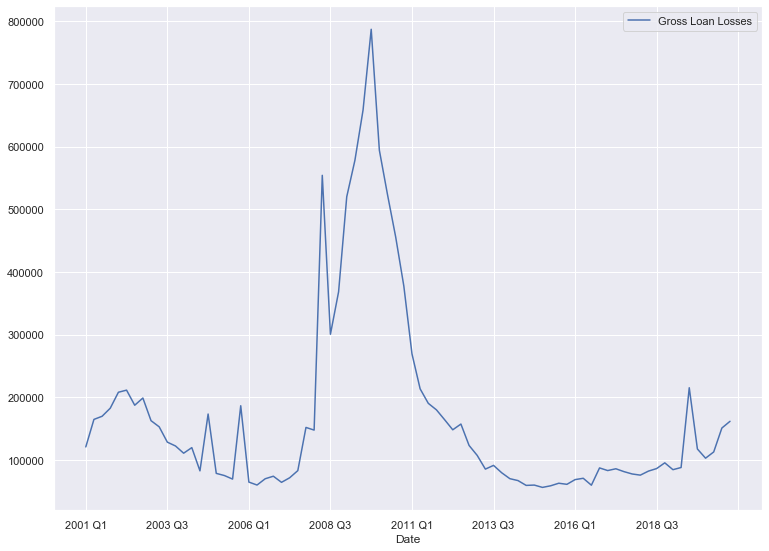

In [307]:
import matplotlib.pyplot as plt
keybank_cf.set_index("Date")[["Gross Loan Losses"]].plot()

In [308]:
import plotly.express as px

fig = px.line(keybank_cf, x="Date", y="Gross Loan Losses", title='Gross Loan Losses Time Series')
fig.show()

In [309]:
cf_ccar = keybank_cf.merge(ccar_var ,how = "right" , on = "Date").dropna().set_index("Date").drop(["Scenario Name"], axis= 1)

In [310]:
cf_ccar

,Gross Loan Losses,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Date,,,,,,,,,,,,,,,,,
2001 Q1,120677.0,-1.1,1.3,3.7,6.5,4.2,3.9,4.8,4.9,5.3,7.5,7.0,8.6,10645.9,112.1,143.0,32.8
2001 Q2,164591.0,2.4,4.9,-0.7,1.2,4.4,2.8,3.7,4.9,5.5,7.5,7.1,7.3,11407.2,114.2,142.2,34.7
2001 Q3,169589.0,-1.6,-0.1,9.6,9.8,4.8,1.1,3.2,4.6,5.3,7.2,7.0,6.6,9563.0,116.3,143.8,43.7
2001 Q4,182474.0,1.1,2.4,-5.0,-4.7,5.5,-0.3,1.9,4.2,5.1,7.1,6.8,5.2,10707.7,118.3,139.3,35.3
2002 Q1,207930.0,3.5,4.9,9.3,10.1,5.7,1.3,1.7,4.5,5.4,7.4,7.0,4.8,10775.7,120.4,139.4,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019 Q4,117383.0,2.4,3.9,1.9,3.4,3.6,2.4,1.6,1.6,1.8,3.3,3.7,4.8,33035.4,212.5,300.9,20.6
2020 Q1,102696.0,-5.0,-3.4,2.6,3.9,3.8,1.2,1.1,1.2,1.4,3.4,3.5,4.4,25984.8,215.1,302.4,82.7
2020 Q2,112677.0,-31.4,-32.8,48.5,46.2,13.1,-3.5,0.1,0.4,0.7,3.4,3.2,3.3,31576.8,218.3,303.5,57.1


In [311]:
ccar_var.describe()

,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,2.422581,4.480645,2.875000,4.862903,5.910484,2.400806,2.629032,3.879839,4.520968,6.204032,6.068548,5.835484,13476.106452,135.562903,173.305645,26.819355
std,4.785018,5.241775,5.647802,5.458647,1.732605,2.017545,2.226878,2.203839,2.042009,1.965532,1.873797,2.229120,7946.563232,45.723944,65.795431,11.924598
min,-31.400000,-32.800000,-16.300000,-13.900000,3.600000,-8.900000,0.000000,0.300000,0.600000,2.300000,2.800000,3.300000,2879.300000,75.100000,86.400000,12.700000
25%,1.475000,3.450000,1.200000,3.500000,4.600000,1.800000,0.275000,1.800000,2.700000,4.500000,4.300000,3.450000,8049.975000,86.075000,112.075000,19.225000
50%,2.500000,4.700000,2.800000,4.700000,5.500000,2.600000,2.200000,3.750000,4.400000,6.300000,6.100000,5.350000,11820.000000,138.450000,167.450000,23.250000
75%,3.825000,6.125000,4.400000,6.400000,6.825000,3.325000,4.800000,5.625000,6.125000,7.500000,7.500000,8.300000,16489.975000,173.300000,224.575000,31.825000
max,33.400000,38.300000,48.500000,46.200000,13.100000,7.100000,7.800000,8.700000,8.800000,10.900000,10.300000,10.000000,39219.600000,225.000000,308.700000,82.700000


In [312]:
for i in cf_ccar.columns:
    print(i)

Gross Loan Losses
Real GDP growth
Nominal GDP growth
Real disposable income growth
Nominal disposable income growth
Unemployment rate
CPI inflation rate
3-month Treasury rate
5-year Treasury yield
10-year Treasury yield
BBB corporate yield
Mortgage rate
Prime rate
Dow Jones Total Stock Market Index (Level)
House Price Index (Level)
Commercial Real Estate Price Index (Level)
Market Volatility Index (Level)


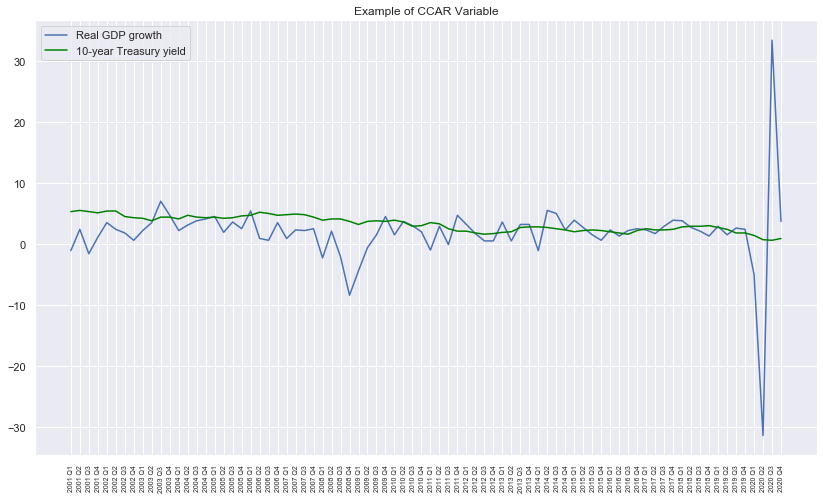

In [313]:

import matplotlib.pyplot as plt


plt.figure(figsize = (14,8))
plt.plot(cf_ccar[['Real GDP growth']] ,label = "Real GDP growth")
plt.plot(cf_ccar[['10-year Treasury yield']]  , color = "green",label = "10-year Treasury yield" )
plt.xticks(rotation = 90 , fontsize=7)
plt.legend(loc="upper left")
plt.title("Example of CCAR Variable")
plt.show()


## STEP 2 Stationary Test
Why we need stationary?

Nonstationary : If we use Nonstationary data for statistical modeling
The relationship capture by model might be “Fake Relationship”, relationship due to chance
Not true population relationships

* Stationary Data
    - Mean : Constant (Mean Constant through time)
    - Variance : Constant (Variance Constant through time)

* Non-Stationary Data
    - Mean : Not Constant (Mean : not constant through time) 
    - Data that has trend
    - Variance : Not Constant (The Variance not constant through time)
    
* The step for test are as followed: 
1. Test all variable
    * if any variable got H0 rejected -> save that variable as : "No change"
2. Apply 1st different to remainging variable and test
    * if any variable got H0 rejected -> save that variable as : "1st diff"
3. Apply 1st different and log to remainging variable and test
    * if any variable got H0 rejected -> save that variable as : "1st log diff"
4. Apply 2nd different  to remainging variable and test
    * if any variable got H0 rejected -> save that variable as : "2nd log diff"   
5. Apply 1st different with seasonal 1st diff to remainging variable and test


In [15]:
# result = adfuller(cf_ccar['Gross Loan Losses'], autolag='AIC')

In [314]:
from statsmodels.tsa.stattools import adfuller

def adftest_allcolumn(df, columns_test):
    
    
    adf_dict = {}
    adf_dict['Variable'] = []
    adf_dict['ADF_test'] = []
    adf_dict['Lag_aic'] = []
    adf_dict['Critical_90'] = []
    adf_dict['Critical_95'] = []
    adf_dict['Critical_99'] = []

    for i in columns_test:
    
        result = adfuller(df[i], maxlag = 8, autolag='AIC' )
        adf_dict['Variable'].append(i)
        adf_dict['ADF_test'].append(result[0])
        adf_dict['Lag_aic'].append(result[2])
        adf_dict['Critical_99'].append(result[4]['1%'])
        adf_dict['Critical_95'].append(result[4]['5%'])
        adf_dict['Critical_90'].append(result[4]['10%'])
        adf_allvar = pd.DataFrame(adf_dict).set_index("Variable")
        
    adf_allvar['Reject_90'] = np.where(adf_allvar['ADF_test'] <=adf_allvar['Critical_90'] ,1,0  )
    adf_allvar['Reject_95'] = np.where(adf_allvar['ADF_test'] <=adf_allvar['Critical_95'] ,1,0  )
    adf_allvar['Reject_99'] = np.where(adf_allvar['ADF_test'] <=adf_allvar['Critical_99'] ,1,0  )
    
    return adf_allvar


In [315]:
adf_allvar = adftest_allcolumn(cf_ccar , cf_ccar.columns)
adf_allvar

,ADF_test,Lag_aic,Critical_90,Critical_95,Critical_99,Reject_90,Reject_95,Reject_99
Variable,,,,,,,,
Gross Loan Losses,-2.617140,4,-2.587781,-2.900925,-3.520713,1,0,0
Real GDP growth,-7.251098,1,-2.586955,-2.899375,-3.517114,1,1,1
Nominal GDP growth,-10.993791,0,-2.586694,-2.898886,-3.515977,1,1,1
Real disposable income growth,-8.143987,1,-2.586955,-2.899375,-3.517114,1,1,1
Nominal disposable income growth,-7.784308,1,-2.586955,-2.899375,-3.517114,1,1,1
Unemployment rate,-2.136268,3,-2.587498,-2.900395,-3.519481,0,0,0
CPI inflation rate,-7.619154,0,-2.586694,-2.898886,-3.515977,1,1,1
3-month Treasury rate,-2.479173,3,-2.587498,-2.900395,-3.519481,0,0,0
5-year Treasury yield,-1.505300,3,-2.587498,-2.900395,-3.519481,0,0,0


In [316]:
variable_pass_1 = adf_allvar[adf_allvar['Reject_95'] == 1].index

In [317]:
var_notpass = [i for i in adf_allvar.index if i not in variable_pass_1]

In [318]:
var_notpass

['Gross Loan Losses',
 'Unemployment rate',
 '3-month Treasury rate',
 '5-year Treasury yield',
 '10-year Treasury yield',
 'BBB corporate yield',
 'Mortgage rate',
 'Prime rate',
 'Dow Jones Total Stock Market Index (Level)',
 'House Price Index (Level)',
 'Commercial Real Estate Price Index (Level)',
 'Market Volatility Index (Level)']

In [319]:
var_notpassdf = cf_ccar[var_notpass]
## create chg variable (to be stationary)
var_notpasschg = var_notpassdf - var_notpassdf.shift(1)
var_notpasschg = var_notpasschg.dropna()

## create log chg variable
var_notp_chglog = np.log1p(var_notpassdf) - np.log1p(var_notpassdf.shift(1))
var_notp_chglog = var_notp_chglog.dropna()


## create seasonal chg variable
var_notp_chgss = var_notpasschg - var_notpasschg.shift(4)
var_notp_chgss = var_notp_chgss.dropna()


## create double chg variable
var_notp_chg2 = var_notpasschg - var_notpasschg.shift(1)
var_notp_chg2 = var_notp_chg2.dropna()

In [320]:
var_notpasschg

,Gross Loan Losses,Unemployment rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Date,,,,,,,,,,,,
2001 Q2,43914.0,0.2,-1.1,0.0,0.2,0.0,0.1,-1.3,761.3,2.1,-0.8,1.9
2001 Q3,4998.0,0.4,-0.5,-0.3,-0.2,-0.3,-0.1,-0.7,-1844.2,2.1,1.6,9.0
2001 Q4,12885.0,0.7,-1.3,-0.4,-0.2,-0.1,-0.2,-1.4,1144.7,2.0,-4.5,-8.4
2002 Q1,25456.0,0.2,-0.2,0.3,0.3,0.3,0.2,-0.4,68.0,2.1,0.1,-9.2
2002 Q2,3377.0,0.1,0.0,0.0,0.0,0.1,-0.2,0.0,-1391.7,3.1,0.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...
2019 Q4,-97722.0,0.0,-0.4,-0.1,0.0,-0.1,0.0,-0.5,2593.6,2.3,-7.8,-4.0
2020 Q1,-14687.0,0.2,-0.5,-0.4,-0.4,0.1,-0.2,-0.4,-7050.6,2.6,1.5,62.1
2020 Q2,9981.0,9.3,-1.0,-0.8,-0.7,0.0,-0.3,-1.1,5592.0,3.2,1.1,-25.6


In [321]:
adf_chg = adftest_allcolumn(var_notpasschg , var_notpasschg.columns)
adf_chg

,ADF_test,Lag_aic,Critical_90,Critical_95,Critical_99,Reject_90,Reject_95,Reject_99
Variable,,,,,,,,
Gross Loan Losses,-11.206861,0,-2.586955,-2.899375,-3.517114,1,1,1
Unemployment rate,-2.131591,2,-2.587498,-2.900395,-3.519481,0,0,0
3-month Treasury rate,-3.593332,6,-2.588679,-2.902607,-3.524624,1,1,1
5-year Treasury yield,-3.646883,2,-2.587498,-2.900395,-3.519481,1,1,1
10-year Treasury yield,-7.320587,1,-2.587223,-2.899878,-3.518281,1,1,1
BBB corporate yield,-7.126654,0,-2.586955,-2.899375,-3.517114,1,1,1
Mortgage rate,-7.282706,1,-2.587223,-2.899878,-3.518281,1,1,1
Prime rate,-3.051719,5,-2.588371,-2.902031,-3.523284,1,1,0
Dow Jones Total Stock Market Index (Level),-2.347709,4,-2.588072,-2.901470,-3.521980,0,0,0


In [322]:
# variable_pass_2

In [323]:
variable_pass_2 = adf_chg[adf_chg['Reject_95'] == 1].index
var_notpass2 = [i for i in adf_chg.index if i not in variable_pass_2]

In [324]:
var_notpass2

['Unemployment rate',
 'Dow Jones Total Stock Market Index (Level)',
 'House Price Index (Level)']

In [325]:
# 3

In [326]:
adf_logchg = adftest_allcolumn(var_notp_chglog[var_notpass2] , var_notp_chglog[var_notpass2].columns)
adf_logchg

,ADF_test,Lag_aic,Critical_90,Critical_95,Critical_99,Reject_90,Reject_95,Reject_99
Variable,,,,,,,,
Unemployment rate,-7.110237,1,-2.587223,-2.899878,-3.518281,1,1,1
Dow Jones Total Stock Market Index (Level),-8.912935,0,-2.586955,-2.899375,-3.517114,1,1,1
House Price Index (Level),-2.109543,4,-2.588072,-2.901470,-3.521980,0,0,0


In [327]:
variable_pass_3 = adf_logchg[adf_logchg['Reject_95'] == 1].index
var_notpass3 = [i for i in adf_logchg.index if i not in variable_pass_3]

In [328]:
var_notpass3

['House Price Index (Level)']

In [329]:
adf_chgchg = adftest_allcolumn(var_notp_chg2[var_notpass3] , var_notpasschg[var_notpass3].columns)
adf_chgchg

,ADF_test,Lag_aic,Critical_90,Critical_95,Critical_99,Reject_90,Reject_95,Reject_99
Variable,,,,,,,,
House Price Index (Level),-3.980137,3,-2.588072,-2.90147,-3.52198,1,1,1


In [330]:
variable_pass_4 = adf_chgchg[adf_chgchg['Reject_95'] == 1].index
var_notpass4 = [i for i in adf_chgchg.index if i not in variable_pass_4]

In [331]:
var_notpass4

[]

In [332]:
Vartransform_dict = {"NoChange" : variable_pass_1.tolist(), 
"Diff1" :variable_pass_2.tolist(),
"LogDiff1":variable_pass_3.tolist(),
"Diff2":variable_pass_4.tolist()}

# All_var = variable_pass_1.tolist() + variable_pass_2.tolist() + variable_pass_3.tolist() + variable_pass_4.tolist()


## Here are the variables that need the following trasnfromation to be stationary

In [334]:
Vartransform_dict

{'NoChange': ['Real GDP growth',
  'Nominal GDP growth',
  'Real disposable income growth',
  'Nominal disposable income growth',
  'CPI inflation rate'],
 'Diff1': ['Gross Loan Losses',
  '3-month Treasury rate',
  '5-year Treasury yield',
  '10-year Treasury yield',
  'BBB corporate yield',
  'Mortgage rate',
  'Prime rate',
  'Commercial Real Estate Price Index (Level)',
  'Market Volatility Index (Level)'],
 'LogDiff1': ['Unemployment rate',
  'Dow Jones Total Stock Market Index (Level)'],
 'Diff2': ['House Price Index (Level)']}

In [335]:
def transformation_stationary(df, column_ , transformdict):
    
    df_copy = df.copy()
    for i in column_:
        if i in transformdict["Diff1"]:
            df_copy[i] = df_copy[i] - df_copy[i].shift(1)
        
        elif i in transformdict["LogDiff1"]:
            df_copy[i] = np.log1p(df_copy[i]) - np.log1p(df_copy[i]).shift(1)
            
        elif i in transformdict["Diff2"]:
            temp_df = df_copy[[i]] - df_copy[[i]].shift(1)
            df_copy[i] = temp_df  - temp_df.shift(1)
        
    return df_copy.dropna()
    

In [336]:
cf_ccar_sta = transformation_stationary(cf_ccar , cf_ccar.columns , Vartransform_dict)

# STEP 3 visualization and exploration
* Univariate
* Multivariate

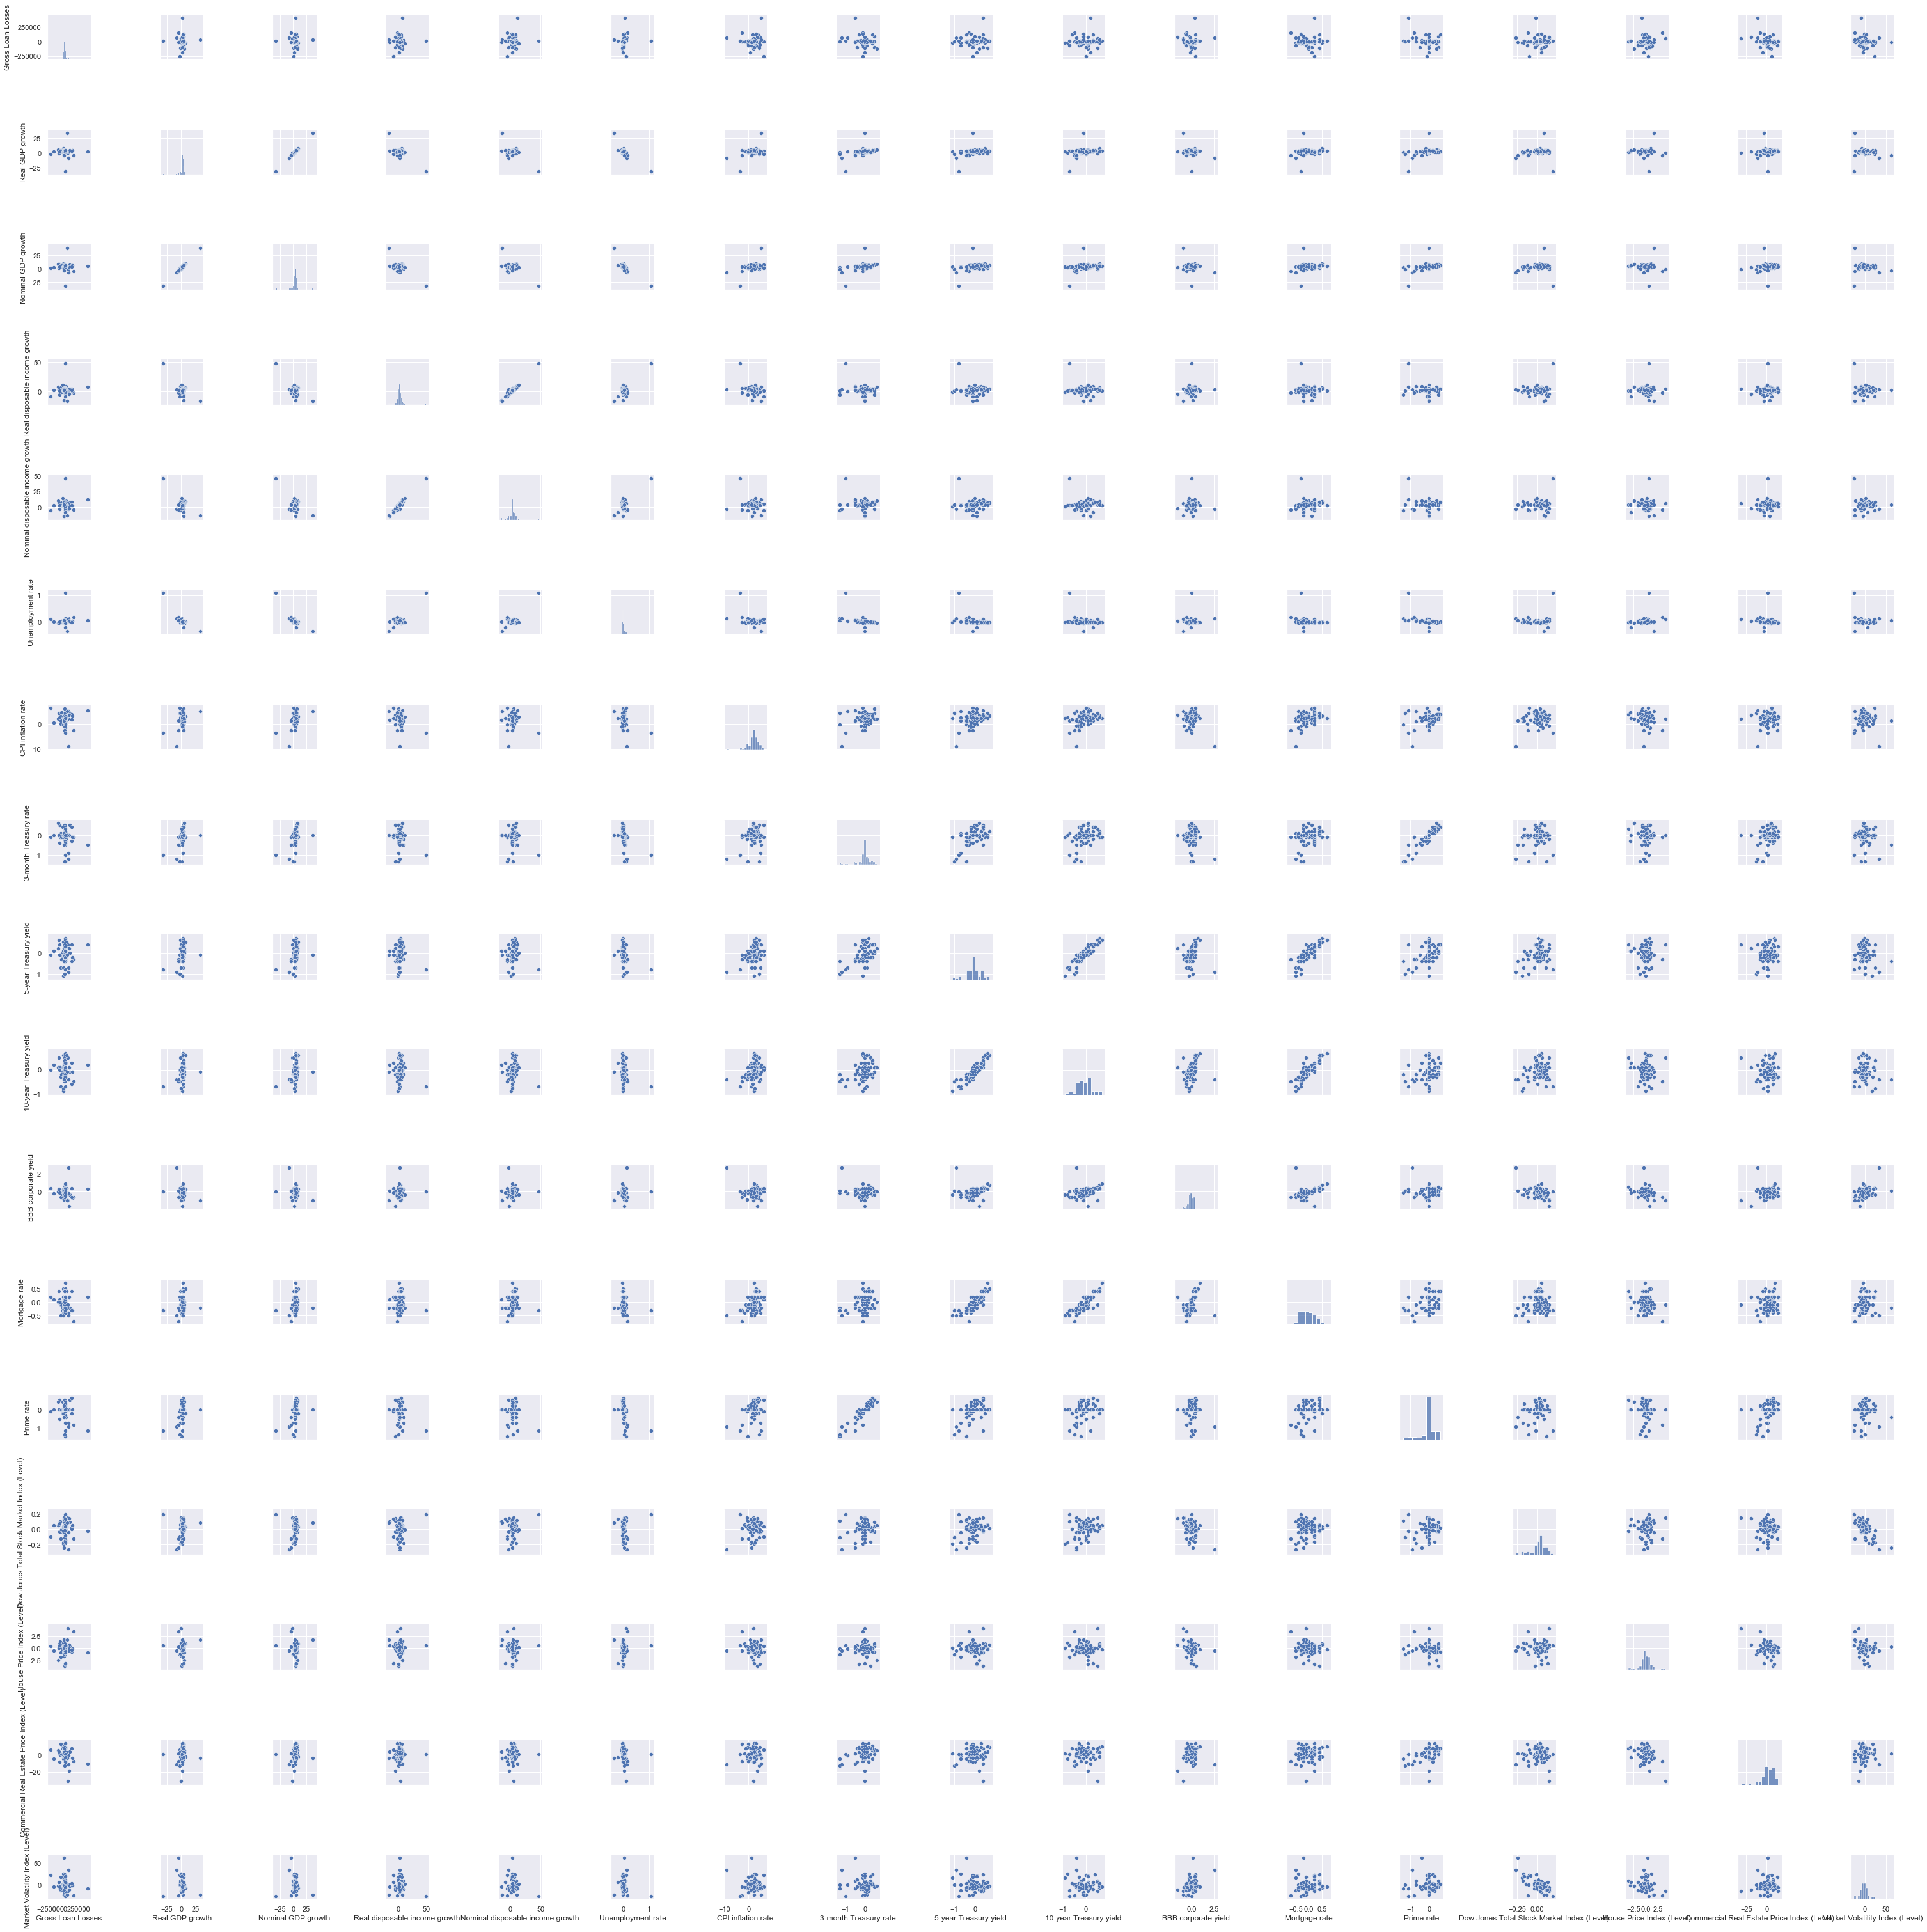

In [338]:
import seaborn as sns
sns.pairplot(cf_ccar_sta)

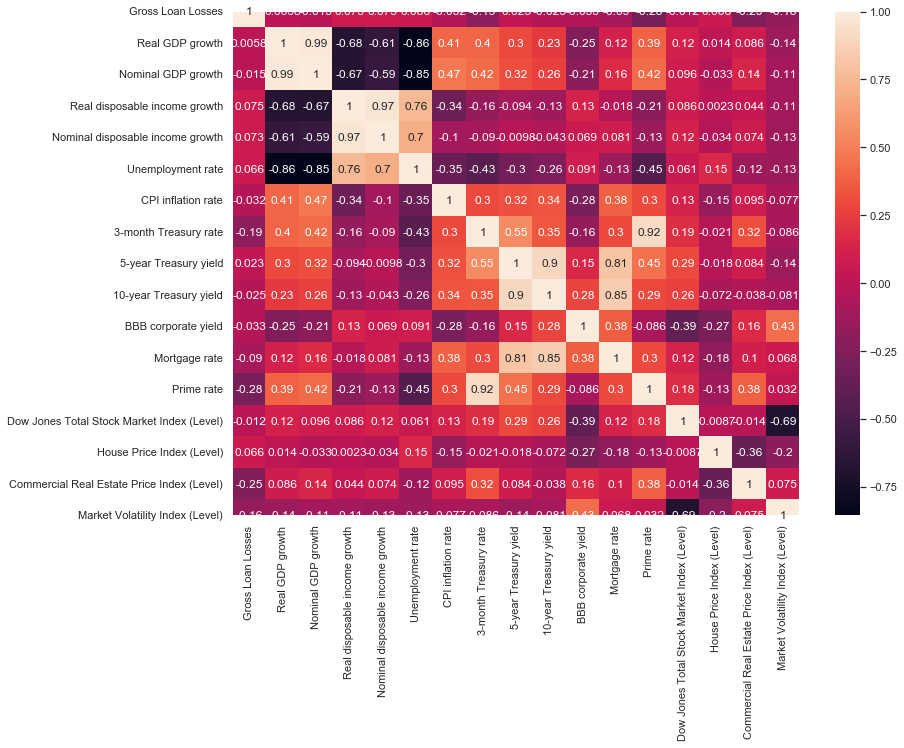

In [339]:
# Correlation 

import seaborn as sns
corrMatrix = cf_ccar_sta.corr()
sns.set(rc={'figure.figsize':(12.7,9.27)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

# sns.reset_orig()

In [340]:
X_col = [i for i in cf_ccar_sta.columns if i not in ['Gross Loan Losses']]

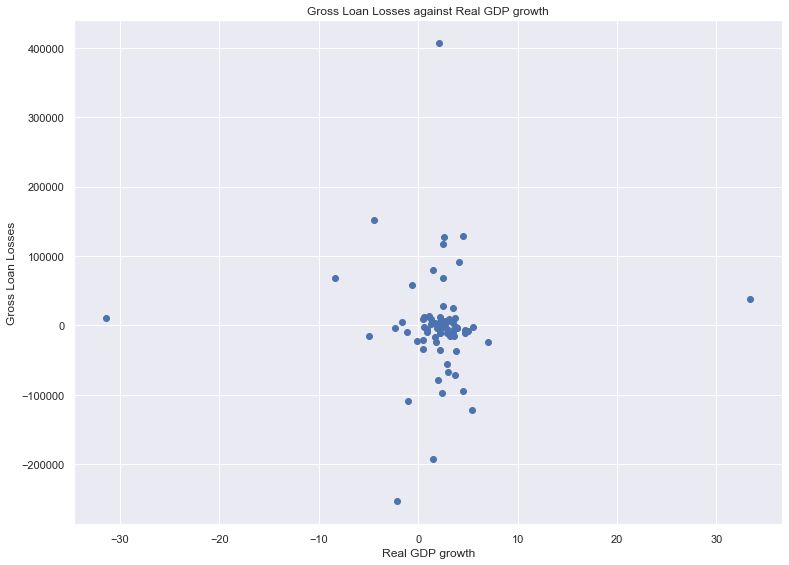

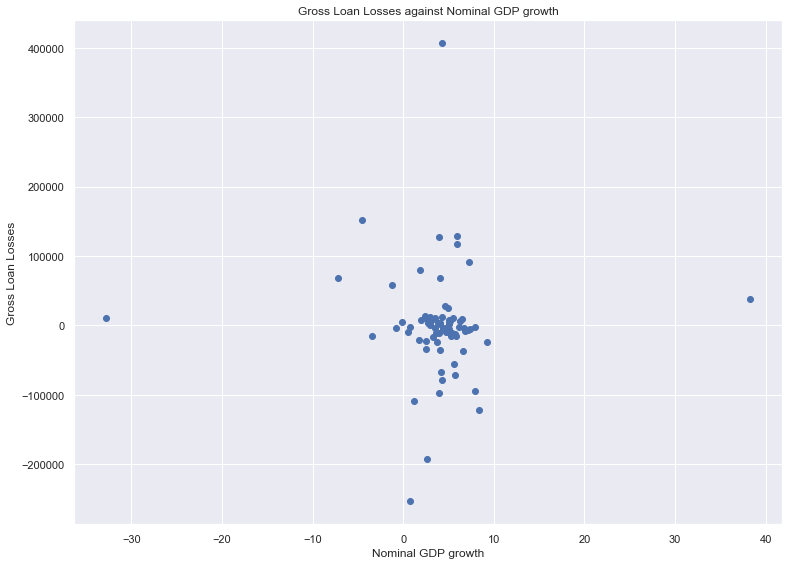

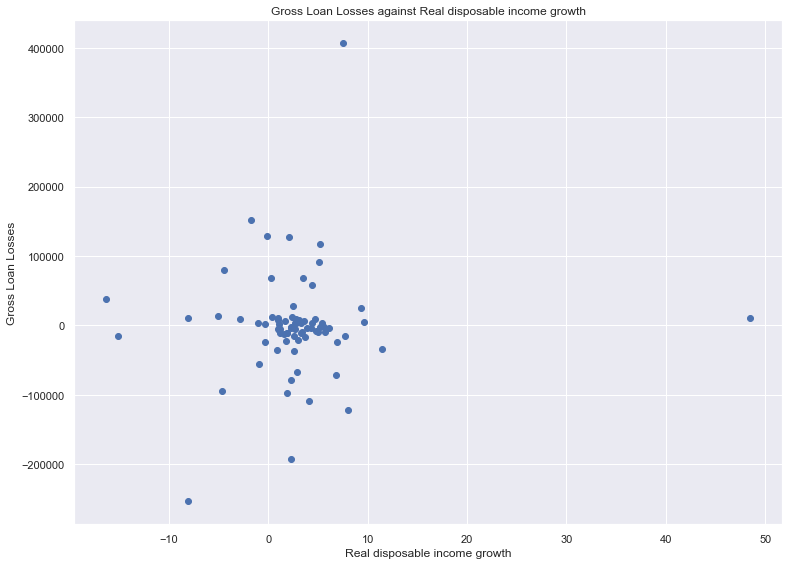

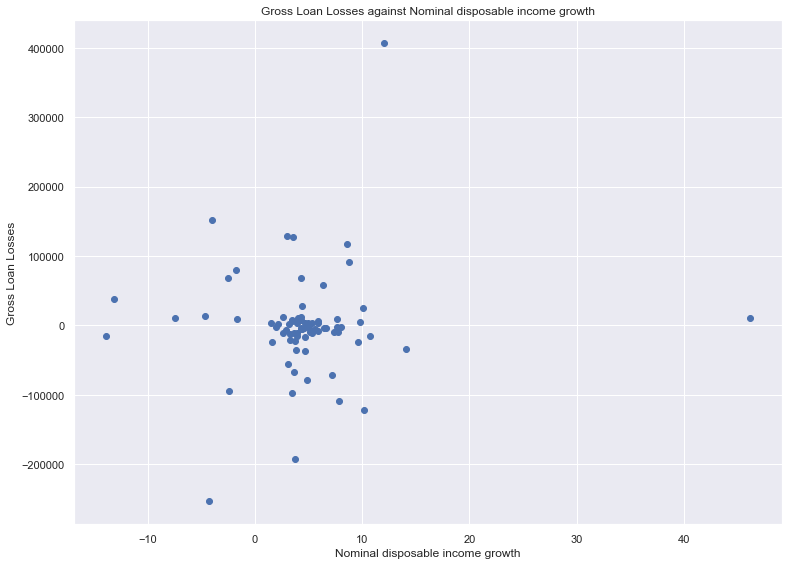

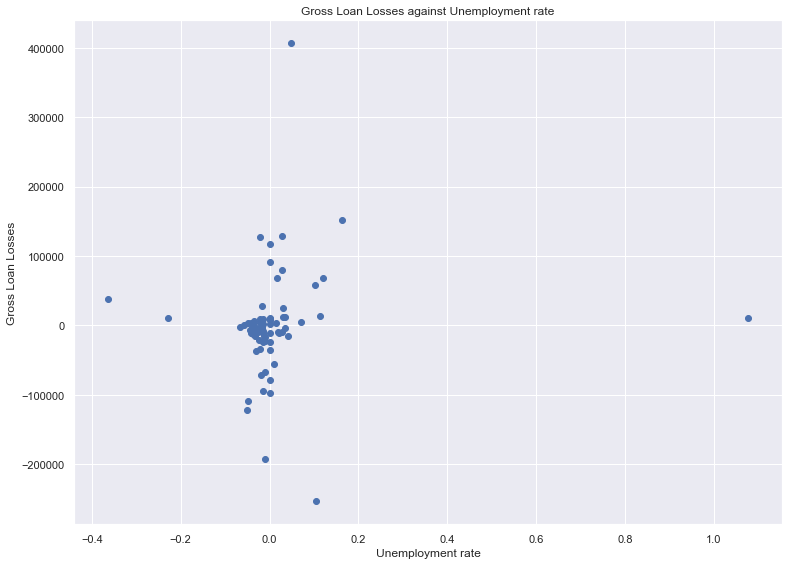

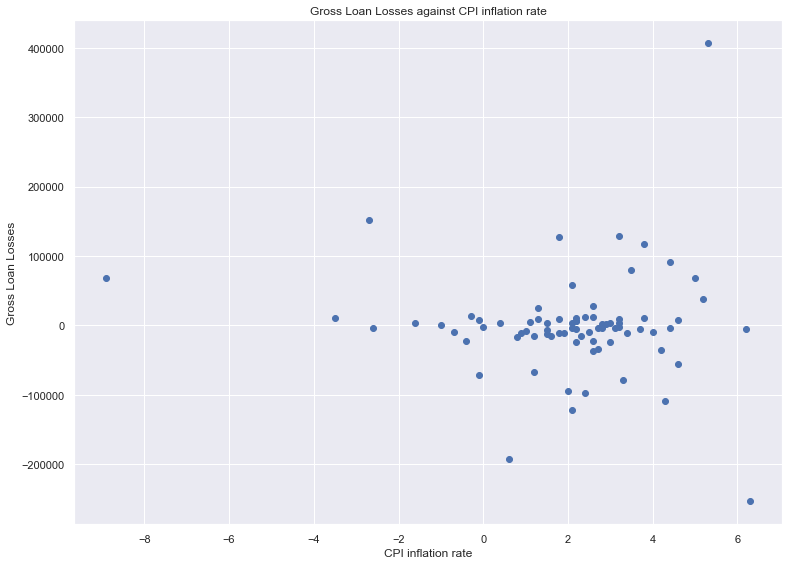

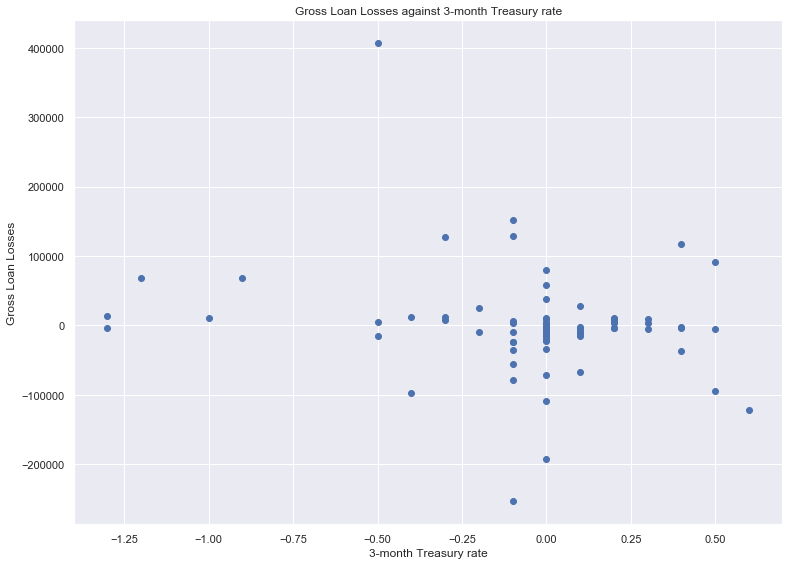

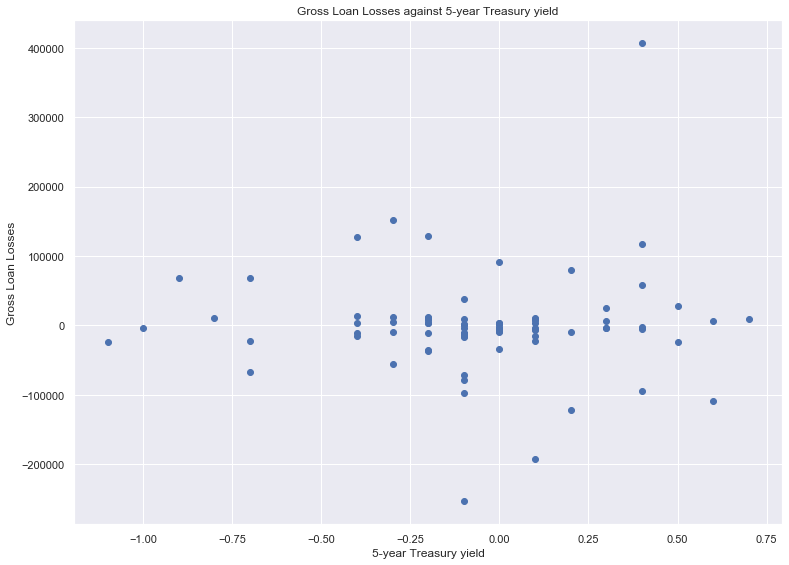

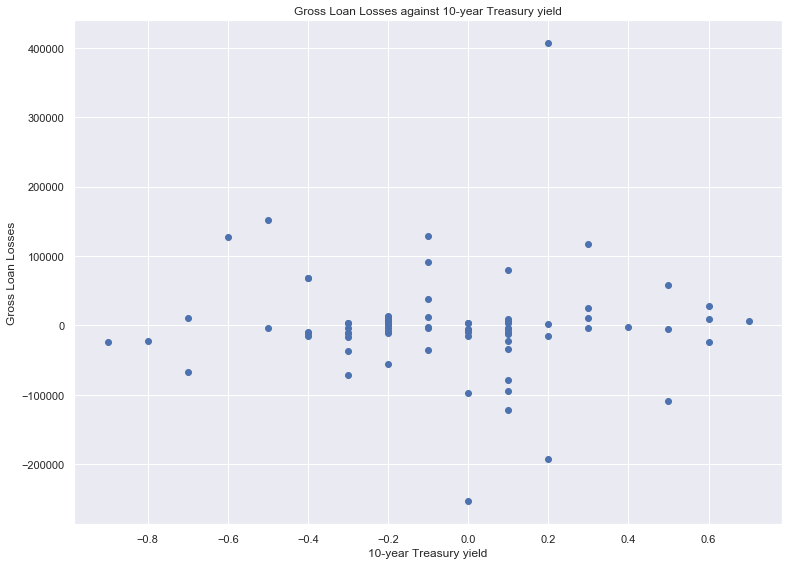

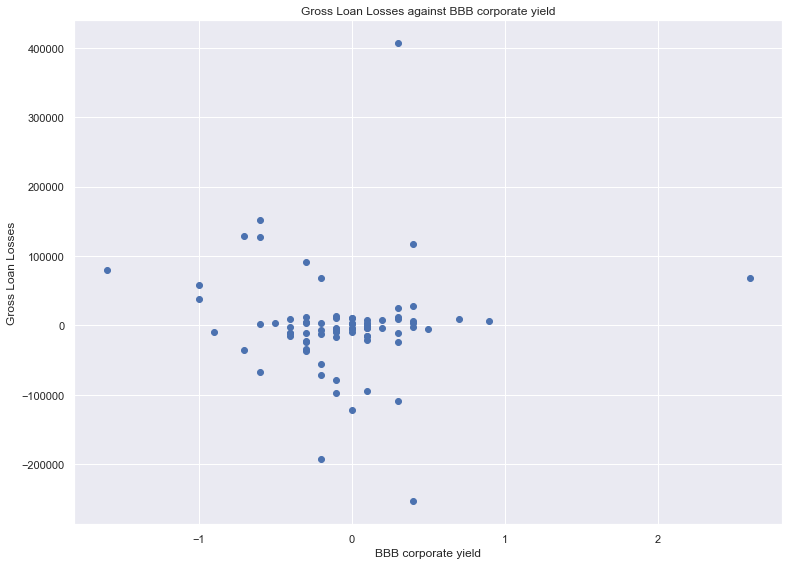

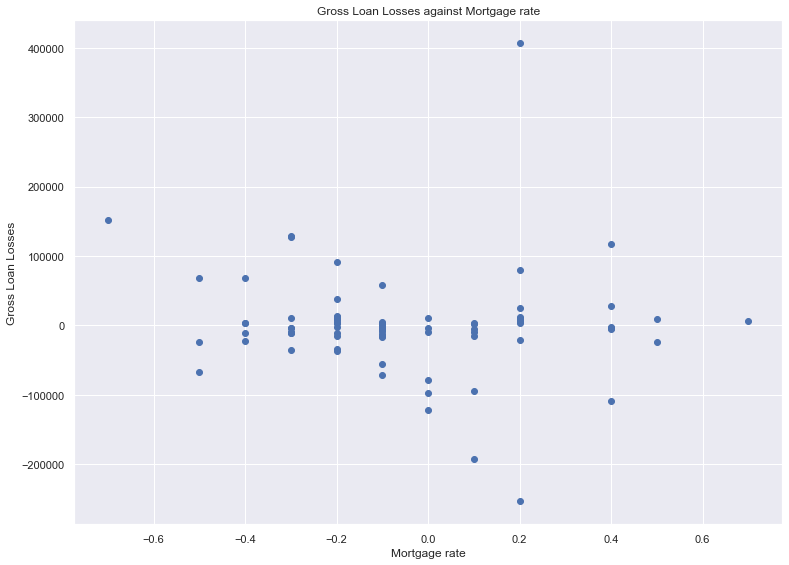

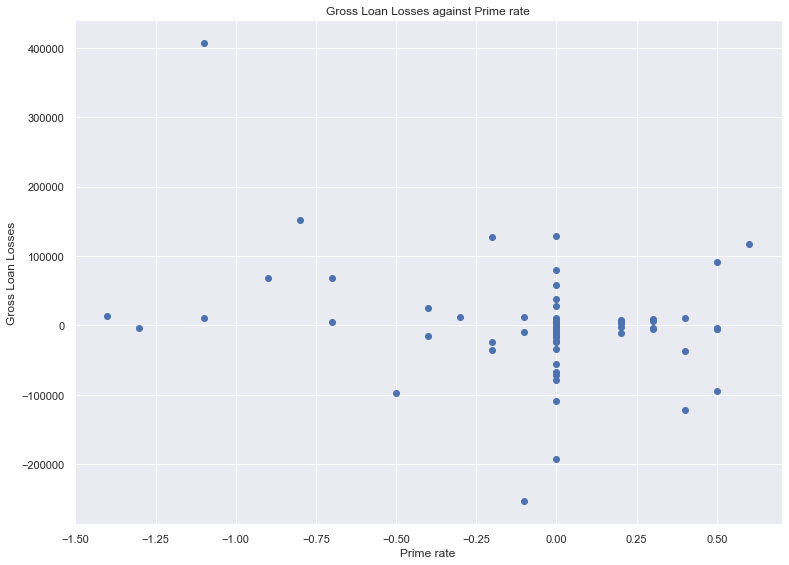

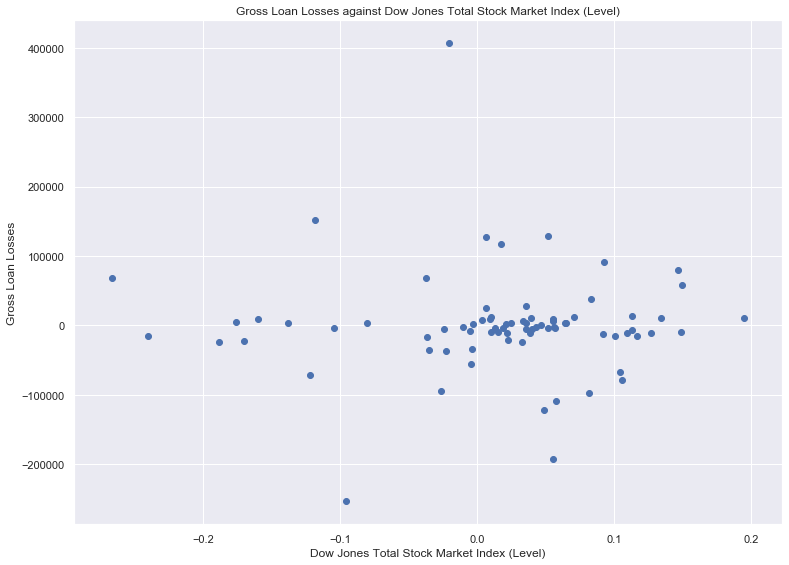

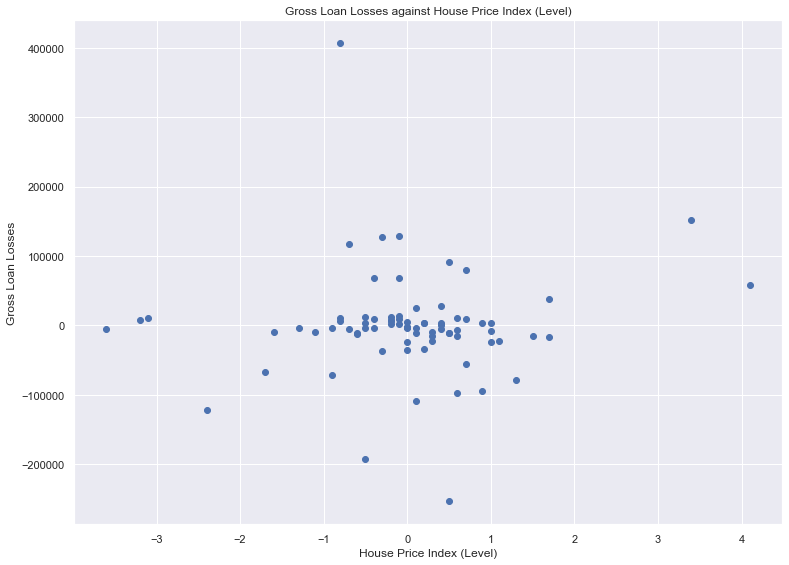

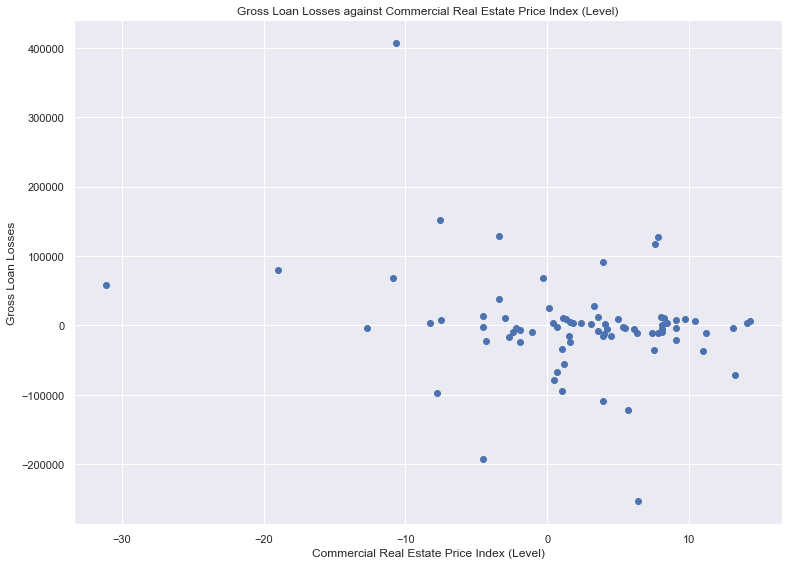

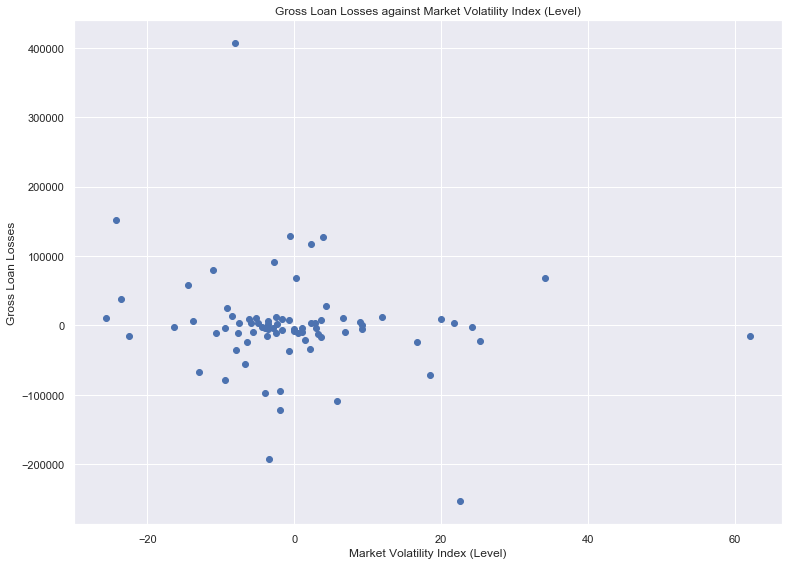

In [41]:
import matplotlib.pyplot as plt
for i in X_col:
    plt.scatter(x=  cf_ccar_sta[i] ,y = cf_ccar_sta['Gross Loan Losses'])
    plt.xlabel("{x}".format(x =i))
    plt.ylabel("Gross Loan Losses")
    plt.title("Gross Loan Losses against {x}".format( x = i))
    plt.show()

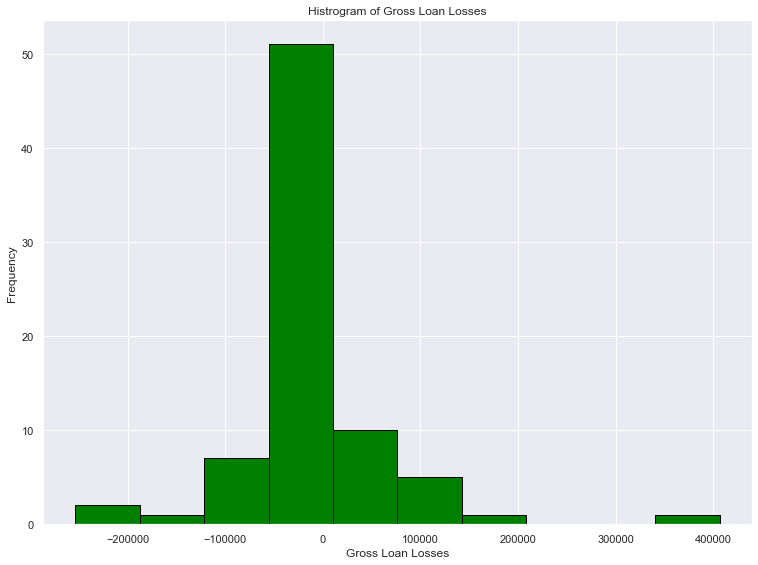

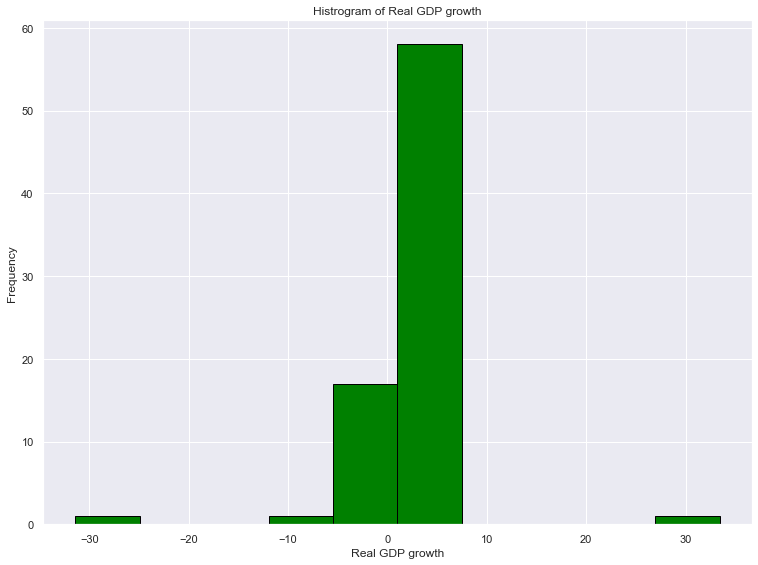

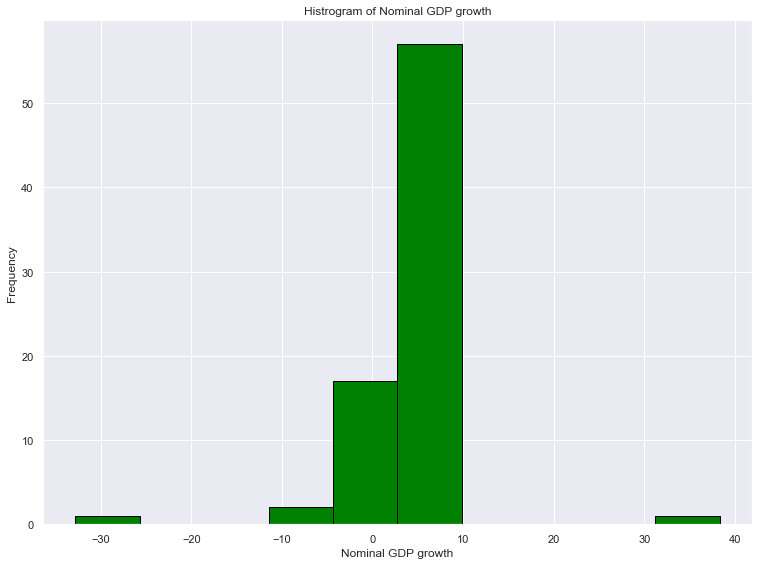

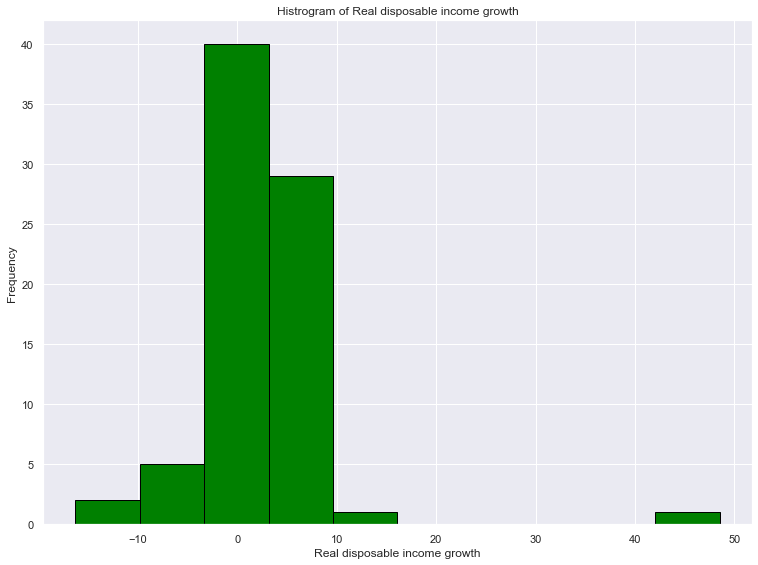

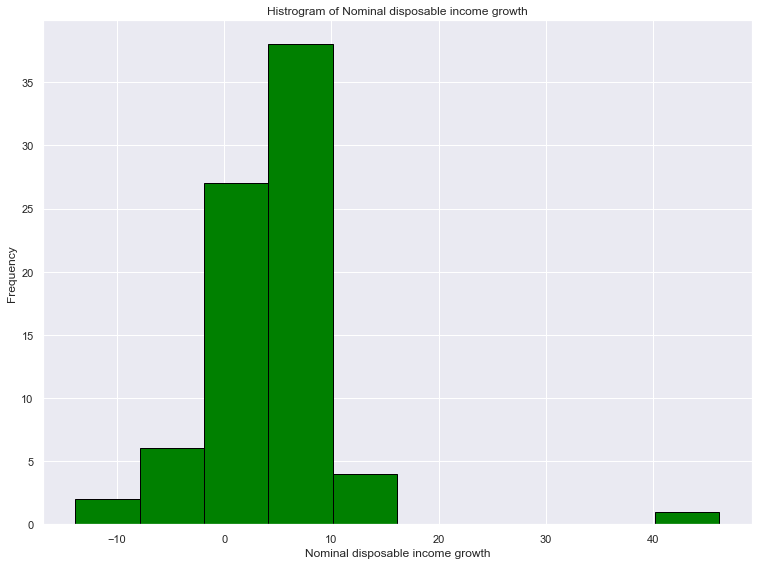

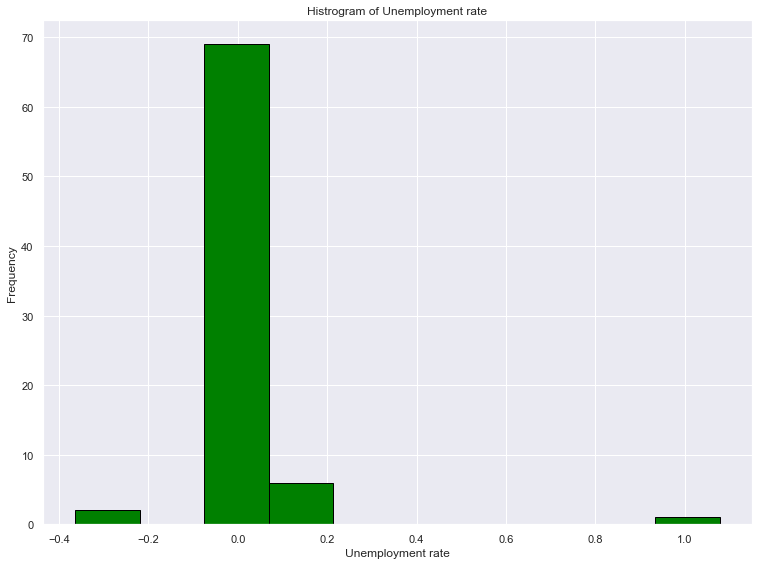

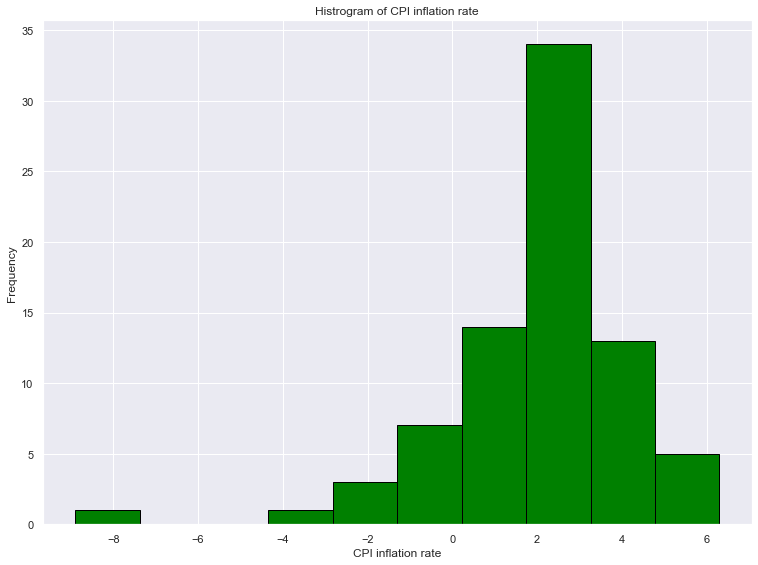

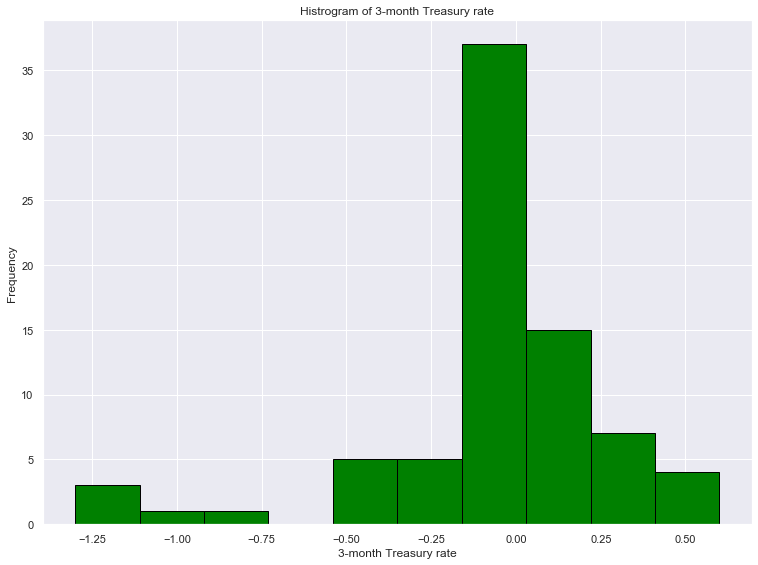

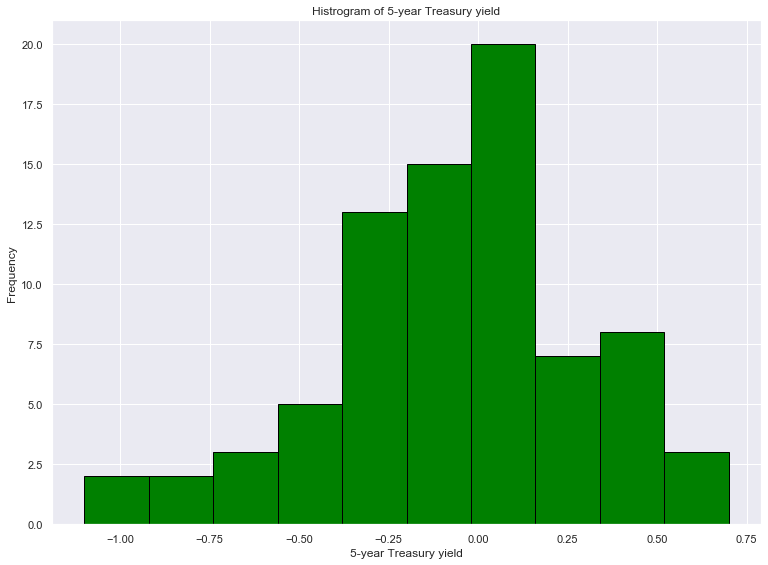

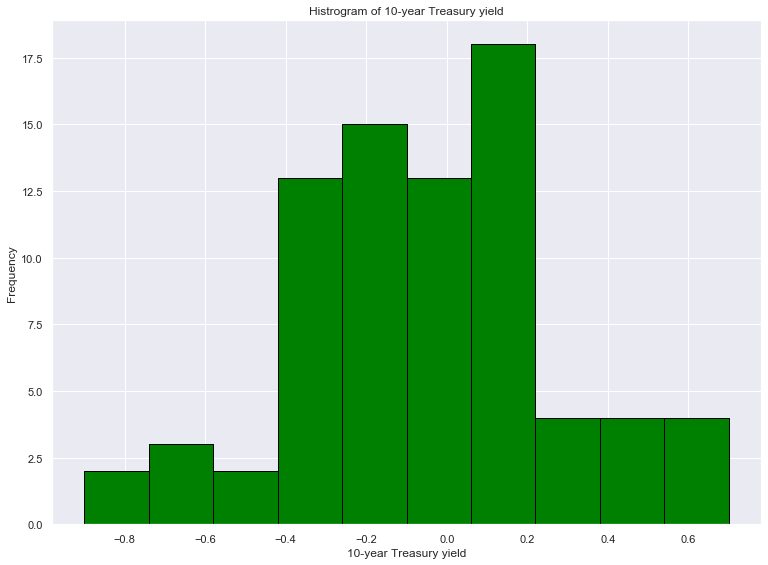

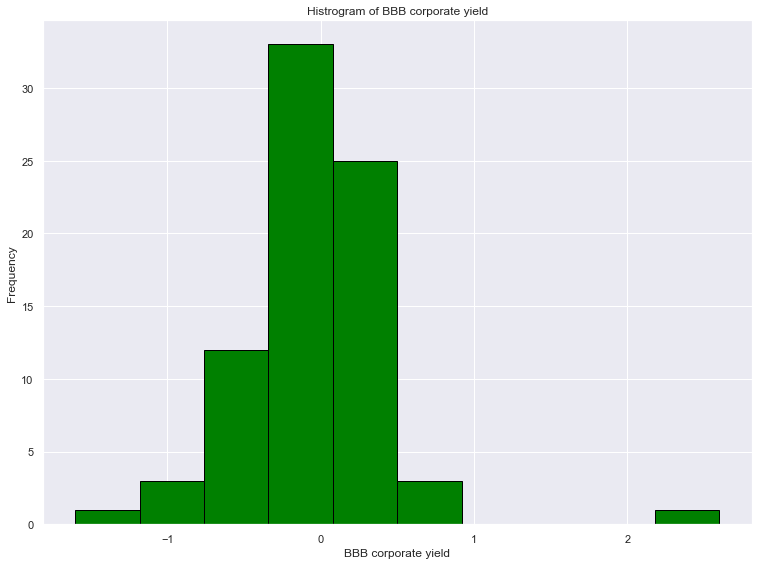

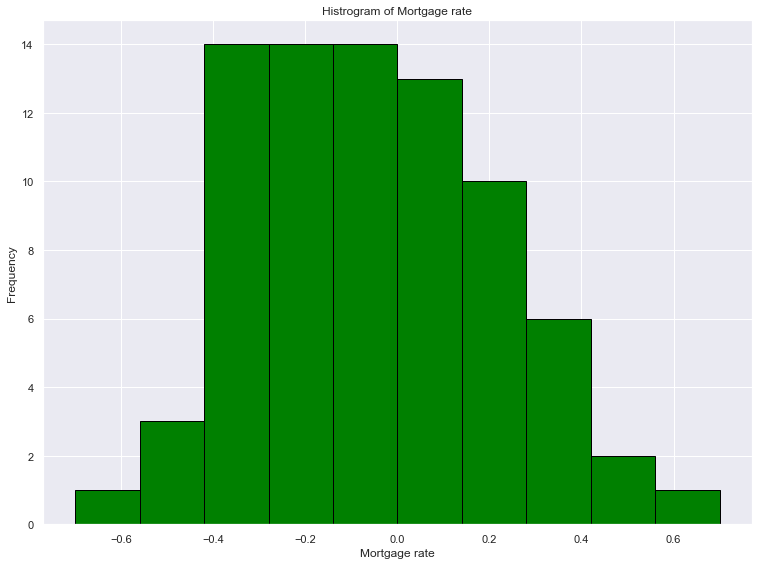

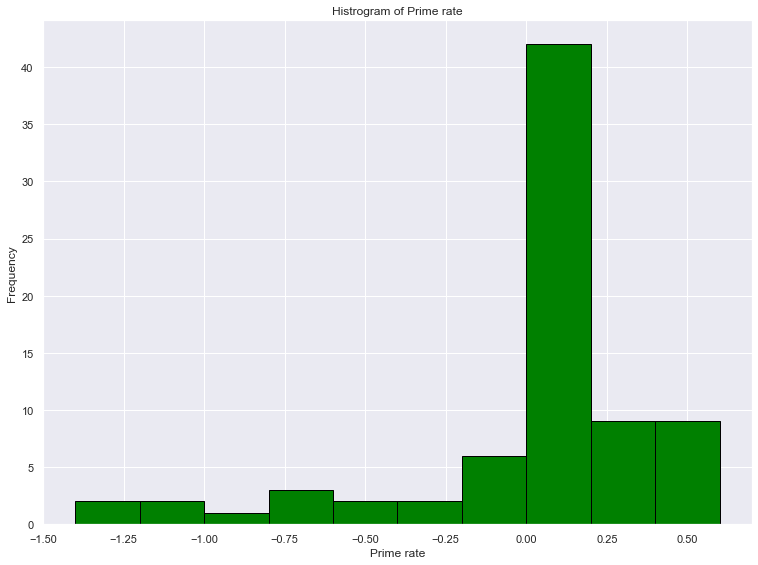

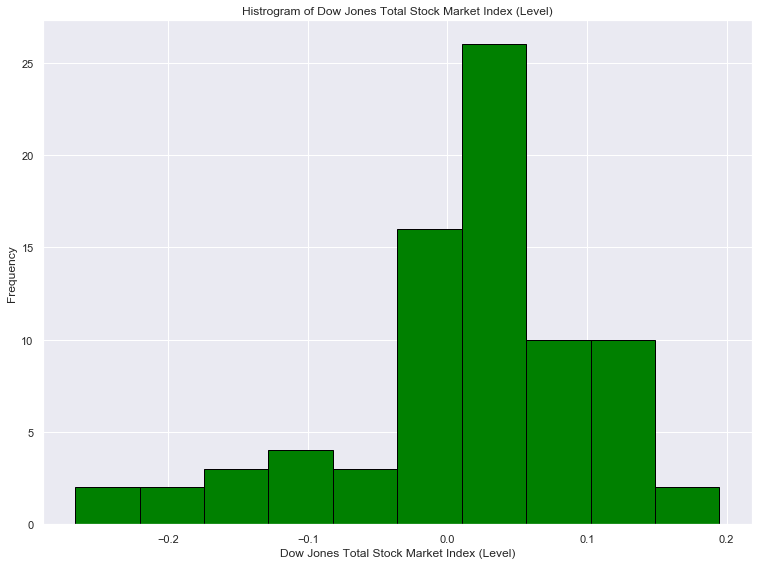

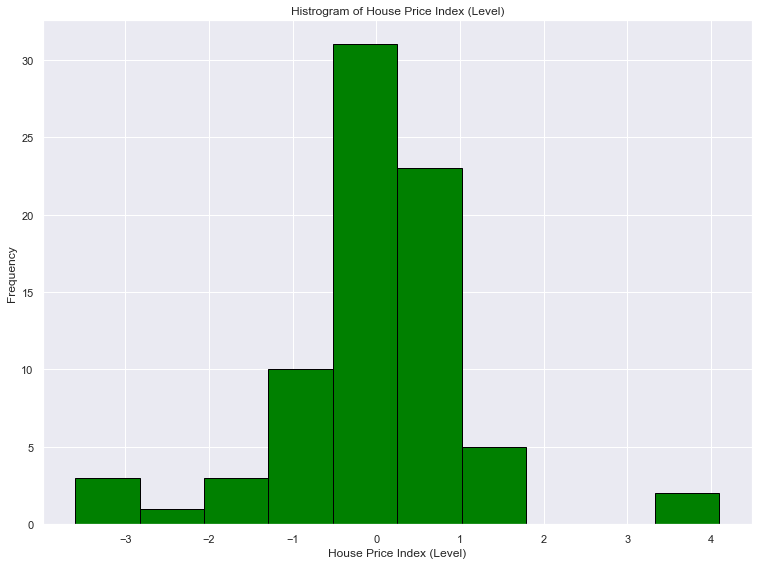

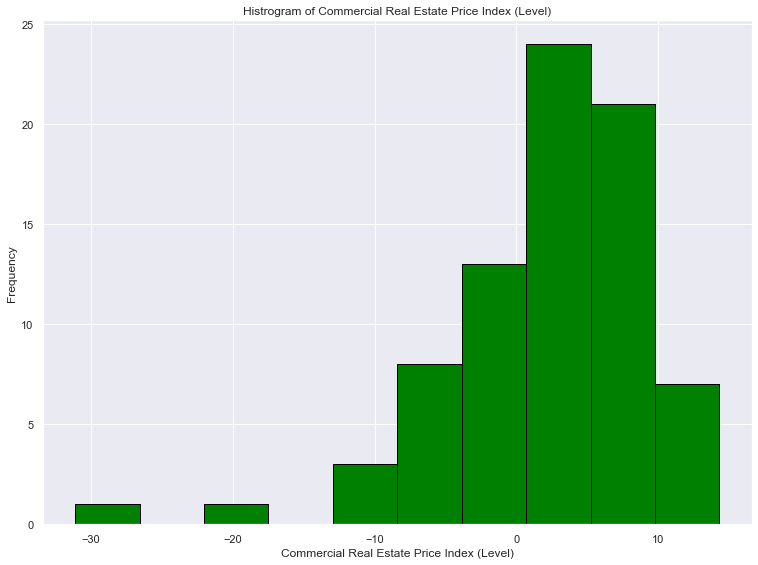

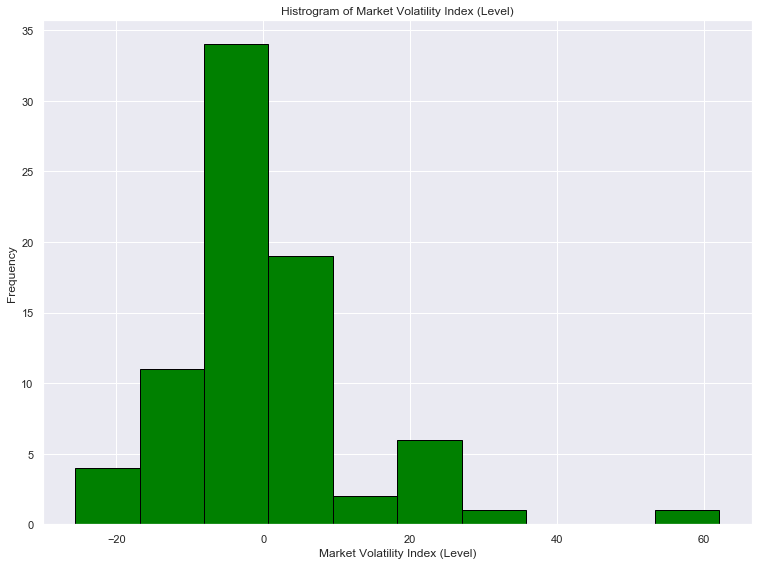

In [42]:

import matplotlib.pyplot as plt
for i in cf_ccar_sta.columns:
    plt.hist(cf_ccar_sta[i], color = 'green', edgecolor = 'black')
    plt.xlabel("{x}".format(x =i))
    plt.ylabel("Frequency")
    plt.title("Histrogram of {x}".format( x = i))
    plt.show()

# Step 4 Data Preperation
* Some of the feature has high correlation consider PCA
* Before PCA we need to scale the dataset
* Standard Scaler -> scaled to 0 mean and 1 variance

In [341]:
# SCaler


from sklearn.preprocessing import StandardScaler

# fit   dataset
scaler = StandardScaler()
scaler.fit(cf_ccar_sta[X_col])

# transform  dataset
X_sc = scaler.transform(cf_ccar_sta[X_col])
X_sc = pd.DataFrame(X_sc, index=cf_ccar_sta[X_col].index, columns = cf_ccar_sta[X_col].columns)



In [342]:
from sklearn.decomposition import PCA


# n_component = 
n_component = len(X_col)
pca = PCA(n_components=n_component)
pca.fit(X_sc)

print("Variance Retained From Each PC :", pca.explained_variance_ratio_)

Variance Retained From Each PC : [3.27079638e-01 1.84852661e-01 1.41029770e-01 1.01540954e-01
 6.78727177e-02 5.42376580e-02 3.82357784e-02 3.08067859e-02
 1.83163920e-02 1.48244637e-02 8.86632862e-03 5.39559958e-03
 4.25744845e-03 2.29669557e-03 3.08908964e-04 7.81991048e-05]


In [343]:
print(np.sum(pca.explained_variance_ratio_))

1.0


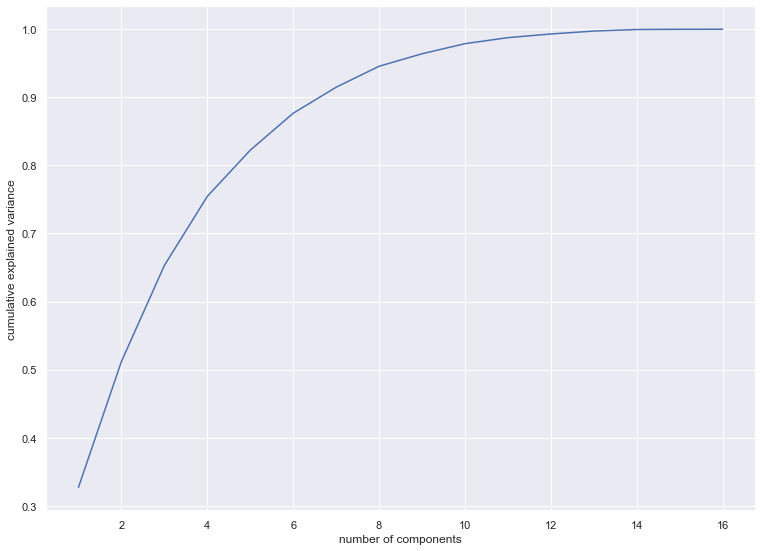

In [344]:
# Plot Cumulative Variance Retained

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()

ax.plot( np.array(range(1,n_component+1)) ,   np.cumsum(pca.explained_variance_ratio_) )
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


In [345]:
# Plotting explained variance
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

###### input#####

X_input = X_sc

######################

pca = PCA(n_components = len(X_col))
pca.fit(X_sc)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [346]:
# PCA loadings
pc_columns =  [f"PC_{i+1}" for i in range(n_component)]
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=pc_columns, index=X_col)
np.round(loading_matrix,3)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16
Real GDP growth,-0.858,-0.350,-0.113,0.034,-0.063,0.053,-0.249,-0.236,0.024,-0.058,0.071,0.056,-0.014,-0.002,0.049,-0.006
Nominal GDP growth,-0.880,-0.308,-0.066,-0.002,-0.093,0.006,-0.265,-0.206,-0.014,-0.071,0.064,0.079,-0.024,0.001,-0.048,0.006
Real disposable income growth,0.699,0.573,-0.153,-0.221,0.056,-0.062,-0.175,-0.287,0.048,-0.012,-0.014,-0.025,-0.004,0.005,0.011,0.025
Nominal disposable income growth,0.587,0.638,-0.187,-0.235,-0.012,-0.237,-0.199,-0.266,0.012,-0.036,-0.045,-0.027,-0.002,-0.003,-0.011,-0.023
Unemployment rate,0.859,0.359,-0.172,0.018,0.016,-0.062,0.005,0.182,-0.078,-0.044,0.160,0.205,-0.052,-0.013,0.004,-0.001
CPI inflation rate,-0.571,0.114,-0.123,0.003,-0.320,-0.695,-0.039,0.172,-0.166,-0.074,-0.096,0.012,0.025,-0.006,0.007,0.005
3-month Treasury rate,-0.666,0.310,-0.130,-0.462,0.421,-0.004,0.149,-0.033,-0.106,0.088,-0.011,0.068,0.065,0.116,0.001,-0.001
5-year Treasury yield,-0.624,0.679,-0.005,0.258,0.124,0.068,-0.025,0.006,0.131,0.156,-0.068,0.089,0.110,-0.097,-0.001,0.000
10-year Treasury yield,-0.555,0.661,0.097,0.446,-0.010,0.051,0.026,0.014,0.059,0.056,-0.111,0.015,-0.185,0.046,0.002,-0.000
BBB corporate yield,0.128,0.334,0.770,0.156,-0.031,0.338,-0.134,-0.033,-0.310,-0.166,-0.086,0.020,0.044,-0.001,0.003,-0.000


In [347]:
# we will use only 8 component: 95%

In [348]:
from sklearn.decomposition import PCA
#####
n_component = 8
#####


pca = PCA(n_components=n_component)
pca.fit(X_sc)

print(pca.explained_variance_ratio_)

[0.32707964 0.18485266 0.14102977 0.10154095 0.06787272 0.05423766
 0.03823578 0.03080679]


In [285]:
# https://plotly.com/python/pca-visualization/

import plotly.express as px

### input#####

X_input = X_sc
y_input = cf_ccar_sta['Gross Loan Losses']
label_y = 'Gross Loan Losses'

###############

components = pca.transform(X_input)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_component)}
labels['color'] = label_y

fig = px.scatter_matrix(
    components,
    color = y_input,
    dimensions=range(n_component),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()


In [286]:
import plotly.express as px
from sklearn.decomposition import PCA

###### input#####

X_input = X_sc
y_input = cf_ccar_sta['Gross Loan Losses']
label_y = 'Gross Loan Losses'
######################


components = pca.transform(X_input)

total_var = pca.explained_variance_ratio_.sum() * 100
labels = {str(i): f"PC {i+1}" for i in range(n_component)}
labels['color'] = label_y

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_input,
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()

In [289]:
import plotly.express as px
from sklearn.decomposition import PCA

###### input#####

X_input = X_sc
y_input = cf_ccar_sta['Gross Loan Losses']
label_y = 'Gross Loan Losses'
######################


components = pca.transform(X_input)

total_var = pca.explained_variance_ratio_.sum() * 100
labels = {str(i): f"PC {i+1}" for i in range(n_component)}
labels['color'] = label_y

fig = px.scatter_3d(
    components, x=0, y=1, z=7, color=y_input,
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.show()

In [294]:
# Visualize Loadings
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


###### input#####

X_input = X_sc
y_input = cf_ccar_sta['Gross Loan Losses']

pc_x = 1
pc_y = 2
######################




features = X_input.columns

components = pca.transform(X_input)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=pc_x -1 , y=pc_y-1, color=y_input ,  labels={
                     "{z}".format(z = pc_x -1): "PC {z}".format(z = pc_x ),
                     "{z}".format(z = pc_y -1): "PC {z}".format(z = pc_y )})

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [293]:
# Visualize Loadings
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


###### input#####

X_input = X_sc
y_input = cf_ccar_sta['Gross Loan Losses']

pc_x = 1
pc_y = 8
######################




features = X_input.columns

components = pca.transform(X_input)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=pc_x -1 , y=pc_y-1, color=y_input ,  labels={
                     "{z}".format(z = pc_x -1): "PC {z}".format(z = pc_x ),
                     "{z}".format(z = pc_y -1): "PC {z}".format(z = pc_y )})

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

## STEP 5 Time Series Modeling
* We determine the lag of AR and GRACH/ARCH
    * using ACF, PACF plot
* Then we do ARX with Grach variance modeling 

C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



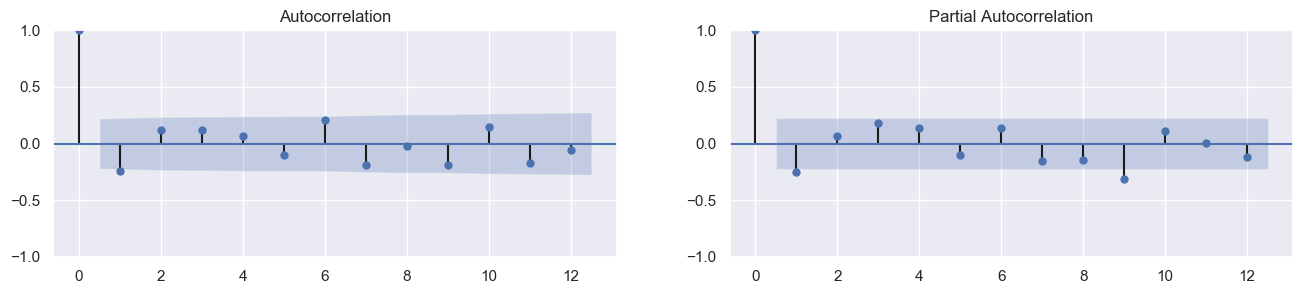

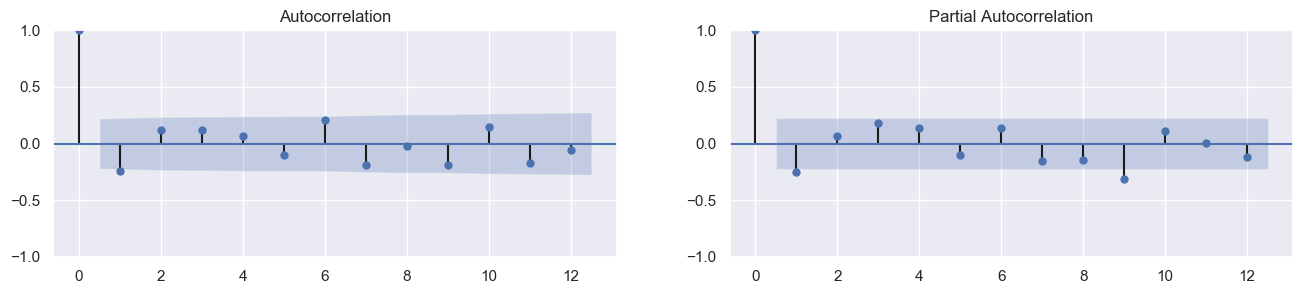

In [349]:
# timeseries 

# test for AR MA 


from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf( cf_ccar_sta['Gross Loan Losses'], lags=12, ax=axes[0])
plot_pacf( cf_ccar_sta['Gross Loan Losses'], lags=12, ax=axes[1])

# only lag 1

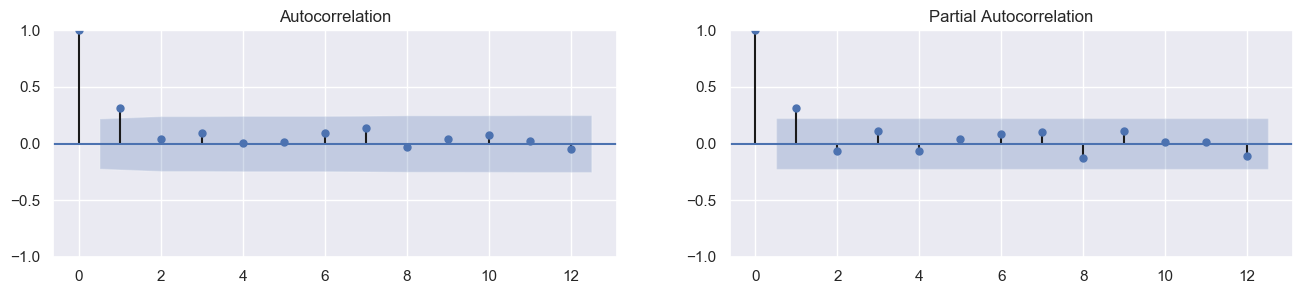

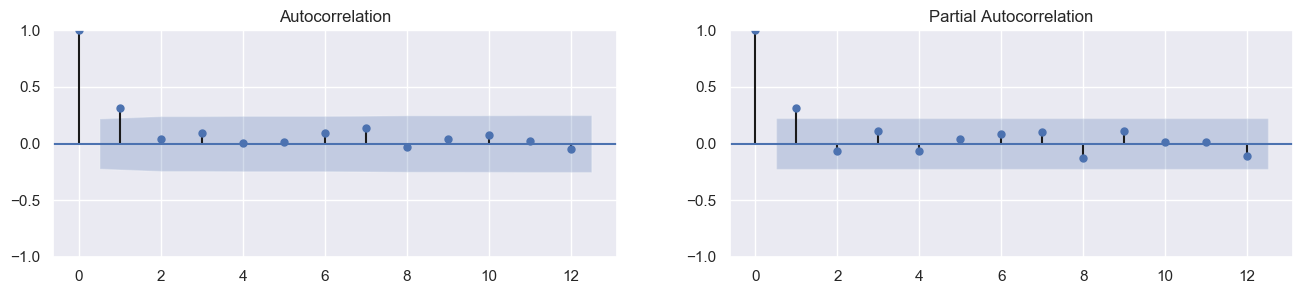

In [350]:
# test for Garch , Arch

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf( cf_ccar_sta['Gross Loan Losses']**2, lags=12, ax=axes[0])
plot_pacf( cf_ccar_sta['Gross Loan Losses']**2, lags=12, ax=axes[1])

# only lag 1 

In [351]:
from sklearn.decomposition import PCA
#####
n_component = 8

#####


pca = PCA(n_components=n_component)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print(pca.explained_variance_ratio_)

[0.32707964 0.18485266 0.14102977 0.10154095 0.06787272 0.05423766
 0.03823578 0.03080679]


In [352]:

columns_pca = ["PC_"+ str(i+1) for i in range(pca.n_components)]
X_pca = pd.DataFrame(X_pca, index=X_sc[X_col].index, columns = columns_pca)

In [353]:
# PCA loadings
pc_columns =  [f"PC_{i+1}" for i in range(n_component)]
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=pc_columns, index=X_sc.columns)
loading_matrix

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
Real GDP growth,-0.858421,-0.350433,-0.113452,0.033854,-0.063048,0.053015,-0.248657,-0.236257
Nominal GDP growth,-0.879973,-0.307552,-0.065619,-0.002421,-0.093427,0.006191,-0.264754,-0.205878
Real disposable income growth,0.698719,0.573162,-0.152565,-0.220693,0.056407,-0.061655,-0.175436,-0.287064
Nominal disposable income growth,0.586534,0.638160,-0.186854,-0.234686,-0.012351,-0.237047,-0.199165,-0.266201
Unemployment rate,0.859328,0.358531,-0.172421,0.017892,0.016325,-0.062180,0.004662,0.182478
CPI inflation rate,-0.570716,0.113812,-0.122731,0.003106,-0.320435,-0.694505,-0.039122,0.172237
3-month Treasury rate,-0.666388,0.310106,-0.129716,-0.462232,0.421296,-0.004135,0.149392,-0.033338
5-year Treasury yield,-0.623845,0.678891,-0.005337,0.258227,0.123737,0.068426,-0.024952,0.005995
10-year Treasury yield,-0.555290,0.661348,0.096589,0.445955,-0.010137,0.051476,0.025766,0.013813
BBB corporate yield,0.128340,0.334359,0.770149,0.155760,-0.030638,0.337913,-0.133650,-0.033035


In [354]:
# pip install arch --user

In [355]:
from arch.univariate import GARCH,ARX
# a mean model, e.g., a constant mean or an ARX;

ar = ARX( cf_ccar_sta['Gross Loan Losses'] 
         , x = X_pca
         , lags=1
#          , rescale=False
        )
ar.volatility = GARCH( p=1)
res = ar.fit(disp="off")
print(res.summary())

                          AR-X - GARCH Model Results                          
Dep. Variable:      Gross Loan Losses   R-squared:                       0.027
Mean Model:                      AR-X   Adj. R-squared:                 -0.104
Vol Model:                      GARCH   Log-Likelihood:               -947.361
Distribution:                  Normal   AIC:                           1920.72
Method:            Maximum Likelihood   BIC:                           1951.19
                                        No. Observations:                   77
Date:                Mon, Aug 08 2022   Df Residuals:                       67
Time:                        03:01:48   Df Model:                           10
                                    Mean Model                                   
                     coef    std err          t      P>|t|       95.0% Conf. Int.
---------------------------------------------------------------------------------
Const           2489.5405   6843.811      0

C:\Users\wann\AppData\Roaming\Python\Python37\site-packages\arch\univariate\base.py:310: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 4.407e+09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




# Step 6 
* Make every Process into function to apply the economic stress scenrios

In [356]:
def apply_how(last_row_ ,how_ ,  name_, value_):
    last_row_ans = last_row_.copy()
    
    for i in value_:
        if how_ == "level":
            last_row_temp = last_row_ans.iloc[[-1],:].copy()
            last_row_temp[name_] = i
            last_row_ans = pd.concat([last_row_ans, last_row_temp ] , ignore_index=True)
        elif how_ == "change":
            last_row_temp = last_row_ans.iloc[[-1],:].copy()
            last_row_temp[name_] = last_row_temp.iloc[[-1],:][name_] + i
            last_row_ans = pd.concat([last_row_ans, last_row_temp ], ignore_index=True)
        elif how_ == "percent":
            last_row_temp = last_row_ans.iloc[[-1],:].copy()
            last_row_temp[name_] = last_row_temp.iloc[[-1],:][name_] * (1+i)
            last_row_ans = pd.concat([last_row_ans, last_row_temp ], ignore_index=True)
            
    return last_row_ans


def create_date(last_row_,  period_):
    date_list = []
    last_date_ = last_row_.index[0]
    
    for j in range(period_):
        
        if last_date_[-1] == '4':
            last_date_ = str( int(last_date_[:4]) + 1 ) + " Q1"
            date_list.append(last_date_)
        else:
            last_date_ =str(last_date_[:4]) + " Q" + str(int(last_date_[-1]) + 1)
            date_list.append(last_date_)
    date_list_startp = [last_row_.index[0]] + date_list
    return date_list , date_list_startp
    
    
def transformation_pipeline(orginal_df  ,
                            forecast_var_dict ,
                            sta_trans_dict  , # stationary dict
                            scaler = None,
                            pca = None,
                            manual_dict = None 

                           ):
    
    if manual_dict:
        # for next version
        return "DONE"
    
    name_ = forecast_var_dict['Name']
    how_ = forecast_var_dict['How']
    value_ = forecast_var_dict['Value']
    period_ = len(value_)
    last_row_ = orginal_df.iloc[[-1],:]
    
    # apply scenario
    scenario_df = apply_how(last_row_ , how_ , name_, value_ )
    partialdf_prep = scenario_df.iloc[1:,:]
    
    
    # create date
    date_list_ , date_list_startp_ = create_date(last_row_ ,period_ )
    partialdf_prep.index = date_list_

    # transformed sta
    fulldf_prep = pd.concat([orginal_df ,partialdf_prep ])
    fulldf_prep = transformation_stationary(fulldf_prep , fulldf_prep.columns , Vartransform_dict)
    X_col = [i for i in fulldf_prep.columns if i not in ['Gross Loan Losses']]
    X_prep = fulldf_prep[X_col]
    
    # check scaler and pca
    
    if scaler:
        X_sc = scaler.transform(X_prep[X_col])
        X_prep = pd.DataFrame(X_sc, index=X_prep[X_col].index, columns = X_prep[X_col].columns)
    
    if pca:
        X_pca = pca.transform(X_prep[X_col])
        columns_pca = ["PC_"+ str(i+1) for i in range(pca.n_components)]
        X_prep = pd.DataFrame(X_pca, index=X_prep[X_col].index, columns = columns_pca)

    return X_prep , date_list_startp_

In [357]:
forecast_var_dict = {'Name' : 'Nominal GDP growth',
            'How': 'level',  # level , percent , change
            'Value': [0,0,0],
                    }

In [358]:
full_dataset, date_list_ = transformation_pipeline(cf_ccar ,forecast_var_dict , Vartransform_dict , scaler , pca )

In [359]:
stss_df = full_dataset.loc[date_list_[1]:]

In [360]:
stss_df

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
2021 Q1,-1.078547,-0.754147,0.937408,0.375195,-0.899186,0.558503,1.708565,0.796639
2021 Q2,-1.003629,-0.912944,0.526909,0.817435,0.148555,0.462575,1.019997,1.276568
2021 Q3,-1.003629,-0.912944,0.526909,0.817435,0.148555,0.462575,1.019997,1.276568


In [361]:
forecast_=  res.forecast(horizon = len(forecast_var_dict['Value']),reindex = True, x = stss_df.to_dict('list'))

In [362]:
cf_ccar

,Gross Loan Losses,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Date,,,,,,,,,,,,,,,,,
2001 Q1,120677.0,-1.1,1.3,3.7,6.5,4.2,3.9,4.8,4.9,5.3,7.5,7.0,8.6,10645.9,112.1,143.0,32.8
2001 Q2,164591.0,2.4,4.9,-0.7,1.2,4.4,2.8,3.7,4.9,5.5,7.5,7.1,7.3,11407.2,114.2,142.2,34.7
2001 Q3,169589.0,-1.6,-0.1,9.6,9.8,4.8,1.1,3.2,4.6,5.3,7.2,7.0,6.6,9563.0,116.3,143.8,43.7
2001 Q4,182474.0,1.1,2.4,-5.0,-4.7,5.5,-0.3,1.9,4.2,5.1,7.1,6.8,5.2,10707.7,118.3,139.3,35.3
2002 Q1,207930.0,3.5,4.9,9.3,10.1,5.7,1.3,1.7,4.5,5.4,7.4,7.0,4.8,10775.7,120.4,139.4,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019 Q4,117383.0,2.4,3.9,1.9,3.4,3.6,2.4,1.6,1.6,1.8,3.3,3.7,4.8,33035.4,212.5,300.9,20.6
2020 Q1,102696.0,-5.0,-3.4,2.6,3.9,3.8,1.2,1.1,1.2,1.4,3.4,3.5,4.4,25984.8,215.1,302.4,82.7
2020 Q2,112677.0,-31.4,-32.8,48.5,46.2,13.1,-3.5,0.1,0.4,0.7,3.4,3.2,3.3,31576.8,218.3,303.5,57.1


In [363]:
latest_val = cf_ccar["Gross Loan Losses"][-1]

In [364]:
fval_ = forecast_.mean.values[-1, :]

In [365]:
fval_ = np.insert(fval_, 0, latest_val)
fval_ = fval_.cumsum() 
fval_

array([161572.        , 149739.28328688, 132864.66291978, 115336.2013902 ])

In [366]:
gls_pred = pd.DataFrame({'Gross Loan Losses':fval_ , 
'Date':date_list_}).set_index("Date")

In [367]:
def generate_econ_scenario( cf_ccar ,forecast_var_dict , Vartransform_dict , scaler , pca ):
    full_dataset, date_list_ = transformation_pipeline(cf_ccar ,forecast_var_dict , Vartransform_dict , scaler , pca )
    stss_df = full_dataset.loc[date_list_[1]:]
    forecast_ = res.forecast(horizon = len(forecast_var_dict['Value']),reindex = True, x = stss_df.to_dict('list'))
    latest_val = cf_ccar["Gross Loan Losses"][-1]
    fval_ = forecast_.mean.values[-1, :]
    fval_ = np.insert(fval_, 0, latest_val)
    fval_ = fval_.cumsum() 
    gls_pred = pd.DataFrame({'Gross Loan Losses':fval_ , 'Date':date_list_}).set_index("Date")
    return gls_pred


Text(0.5, 1.0, 'Forecast AR with GARCH')

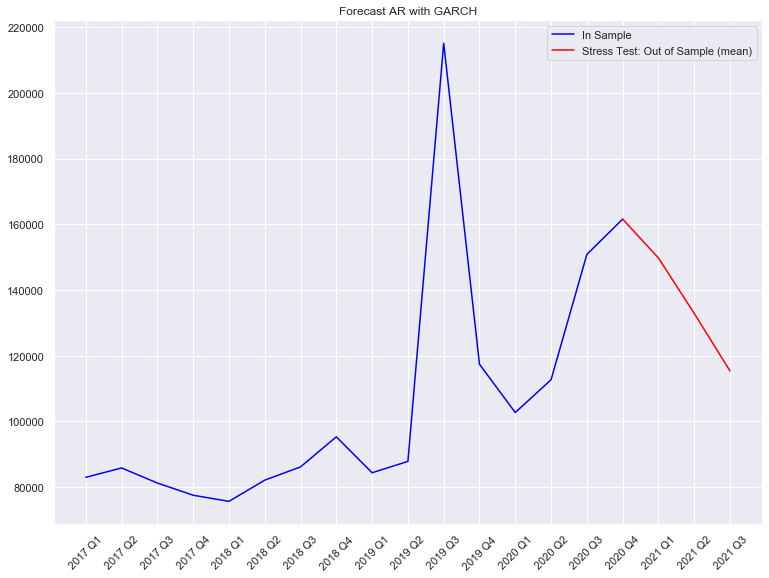

In [265]:
plt.plot(cf_ccar[['Gross Loan Losses']].iloc[-16:], color = "blue" , label = "In Sample")

plt.plot(gls_pred, color = "red" , label = "Stress Test: Out of Sample (mean)")
plt.legend()
plt.xticks(rotation = 45) 
plt.title("Forecast AR with GARCH")

# Step 7:
* We input multiple scenario for the economic variables
    * Level: is input as level (replace the value)
    * Percent: is next period increase by how much percent
    * Change: is next period increse by how much change
* Observe the stress test mean

In [281]:
forecast_var_dict_good = {'Name' :'Commercial Real Estate Price Index (Level)',  
            'How': 'percent',  # level , percent , change
            'Value': [0.1,0,0,0],
                    }

forecast_var_dict_normal = {'Name' :'Commercial Real Estate Price Index (Level)',
            'How': 'percent',  # level , percent , change
            'Value': [0,0,0,0],
                    }
forecast_var_dict_bad = {'Name' : 'Commercial Real Estate Price Index (Level)',
            'How': 'percent',  # level , percent , change
            'Value': [-0.1,0,0,0],
                    }

In [282]:
bad_pred = generate_econ_scenario(cf_ccar ,forecast_var_dict_bad , Vartransform_dict , scaler , pca )
normal_pred = generate_econ_scenario(cf_ccar ,forecast_var_dict_normal , Vartransform_dict , scaler , pca )
good_pred = generate_econ_scenario(cf_ccar ,forecast_var_dict_good , Vartransform_dict , scaler , pca )


Text(0.5, 1.0, 'Forecast AR with GARCH')

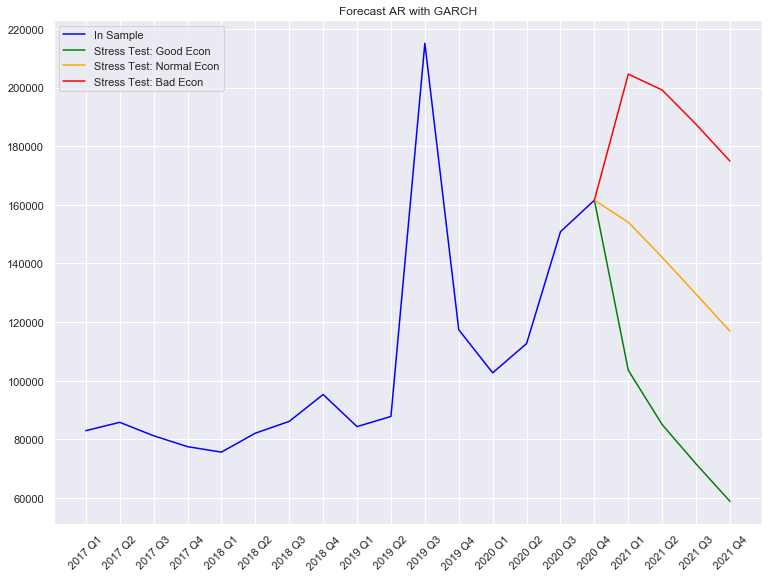

In [283]:
plt.plot(cf_ccar[['Gross Loan Losses']].iloc[-16:], color = "blue" , label = "In Sample")
plt.plot(good_pred, color = "green" , label = "Stress Test: Good Econ")
plt.plot(normal_pred, color = "orange" , label = "Stress Test: Normal Econ")
plt.plot(bad_pred, color = "red" , label = "Stress Test: Bad Econ")
plt.legend()
plt.xticks(rotation = 45) 
plt.title("Forecast AR with GARCH")

In [277]:
cf_ccar

,Gross Loan Losses,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,BBB corporate yield,Mortgage rate,Prime rate,Dow Jones Total Stock Market Index (Level),House Price Index (Level),Commercial Real Estate Price Index (Level),Market Volatility Index (Level)
Date,,,,,,,,,,,,,,,,,
2001 Q1,120677.0,-1.1,1.3,3.7,6.5,4.2,3.9,4.8,4.9,5.3,7.5,7.0,8.6,10645.9,112.1,143.0,32.8
2001 Q2,164591.0,2.4,4.9,-0.7,1.2,4.4,2.8,3.7,4.9,5.5,7.5,7.1,7.3,11407.2,114.2,142.2,34.7
2001 Q3,169589.0,-1.6,-0.1,9.6,9.8,4.8,1.1,3.2,4.6,5.3,7.2,7.0,6.6,9563.0,116.3,143.8,43.7
2001 Q4,182474.0,1.1,2.4,-5.0,-4.7,5.5,-0.3,1.9,4.2,5.1,7.1,6.8,5.2,10707.7,118.3,139.3,35.3
2002 Q1,207930.0,3.5,4.9,9.3,10.1,5.7,1.3,1.7,4.5,5.4,7.4,7.0,4.8,10775.7,120.4,139.4,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019 Q4,117383.0,2.4,3.9,1.9,3.4,3.6,2.4,1.6,1.6,1.8,3.3,3.7,4.8,33035.4,212.5,300.9,20.6
2020 Q1,102696.0,-5.0,-3.4,2.6,3.9,3.8,1.2,1.1,1.2,1.4,3.4,3.5,4.4,25984.8,215.1,302.4,82.7
2020 Q2,112677.0,-31.4,-32.8,48.5,46.2,13.1,-3.5,0.1,0.4,0.7,3.4,3.2,3.3,31576.8,218.3,303.5,57.1


# Future Improvement 
1. Improvement of generalization of model:
    - Validation set 
    - Bootstrap modeling
    - Model Metric Measurement
    - Model Tuning
2. Try with another bank dataset
    - See whether result aligned with this model or not
3. Simultaneous economic scenarios 
    - Test more than 1 economic scenarios


In [ ]:
print("DONE")